In [ ]:
LPSCl, LPSI, LPSClBr, LPGeSI 

In [1]:

import re
import palettable
from pymatgen.ext.matproj import MPRester, Composition, Element, Structure
from pymatgen.analysis.phase_diagram import PhaseDiagram
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymacy.qe import MVLQE

%matplotlib inline


comp = MaterialsProjectCompatibility()
colors = palettable.colorbrewer.qualitative.Set1_9.mpl_colors

In [2]:
#For RDF analysis
from pymatgen.transformations.standard_transformations import SupercellTransformation
from pymatgen.core.structure import Structure
from pymatgen.util.plotting import pretty_plot

from pymatgen.analysis.diffusion.aimd.rdf import RadialDistributionFunctionFast

from fireworks import LaunchPad

import matplotlib 
import numpy as np
import os
from scipy import interpolate

trans = [SupercellTransformation([[1,0,0],[0,1,0],[0,0,1]])]

import pandas as pds
from pymatgen.analysis.diffusion.aimd.van_hove import RadialDistributionFunction as RDF
from pymacy.md.diffusion_tools import RDFAnalyzer

%matplotlib inline
import pandas as pds
from monty.serialization import loadfn, dumpfn
import matplotlib.pyplot as plt

/Users/swastika/repos/pymatgen/pymatgen/analysis/diffusion_analyzer.py:50: FutureWarning: All code in pymatgen.analysis.diffusion_analyzer has been moved to the separate add-on packagepymatgen-diffusion, which also includes a lot more functionality for analyzing diffusioncalculations. This module here is retained for backwards compatibility. It will be removed from2022.1.1.
  FutureWarning,


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib.ticker import MultipleLocator
import numpy as np
from prettyplotlib import brewer2mpl
from pymatgen.util.plotting import pretty_plot
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=1.5
mpl.rcParams['lines.linewidth']=4
mpl.rcParams['lines.markersize']=20
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16
#mpl.rcParams['axes.labelsize']=50

mpl.rcParams['font.family'] = 'arial'


In [ ]:
LPSCl : PBE, PBE-TS, PBE-MBDNL, HSE, HSE-TS, HSE-MBDNL, HSE-MBDNL-ex, PBESOL, PBESOL-ex, 
LPSI : PBE, PBE-TS, PBE-MBDNL, HSE, HSE-TS, HSE-MBDNL, HSE-MBDNL-ex, PBESOL, PBESOL-ex,      

In [ ]:
pbesol_lpscl_s_cl_exchanged_416_at.vasp
pbesol_lpscl_s_cl_exchanged_conventional_mp.vasp

lpscl_hse06_mbd_nl_408_atom.vasp, lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp,
lpscl_conventional_mp_hse06_mbd_nl_tight.vasp, 
lpscl_hse_06_mbdnl_s_cl_exchanged_unitcell.vasp, lpscl_conventional_mp_hse06_light.vasp,
lpscl_conventional_mp_hse06_ts_light.vasp, lpscl_conventional_mp_hse06_mbd_nl.vasp

pbe_ts_lpscl_s_cl_exchanged.vasp
pbe_mbdnl_lpscl_s_cl_exchanged.vasp

lpscl_gor_all_functional.png


In [8]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSI_cif_experimental/"
s=[]
for i in range(3):
    s=Structure.from_file(filename = path+str(i)+".vasp")
    print (i, s.composition)

0 Li24 P4 S20 I4
1 I4 P4 S20 Li72
2 I2 S8 P2 Li24


In [54]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/vasp_format/all/"
s=[]
for i in range(0,10):
    s=Structure.from_file(filename = path+str(i)+".vasp")
    print (i, s.composition)

0 Li48 S20 Cl4 P4
1 Li48 S20 Cl4 P4
2 Li48 S20 Cl4 P4
3 Li96 P4 S20 Cl4
4 Li96 S20 Cl4 P4
5 S20 Cl4 P4 Li96
6 Li96 S20 Cl4 P4
7 Li96 S20 Cl4 P4
8 Li96 S20 Cl4 P4
9 Li96 P4 S20 Cl4


/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


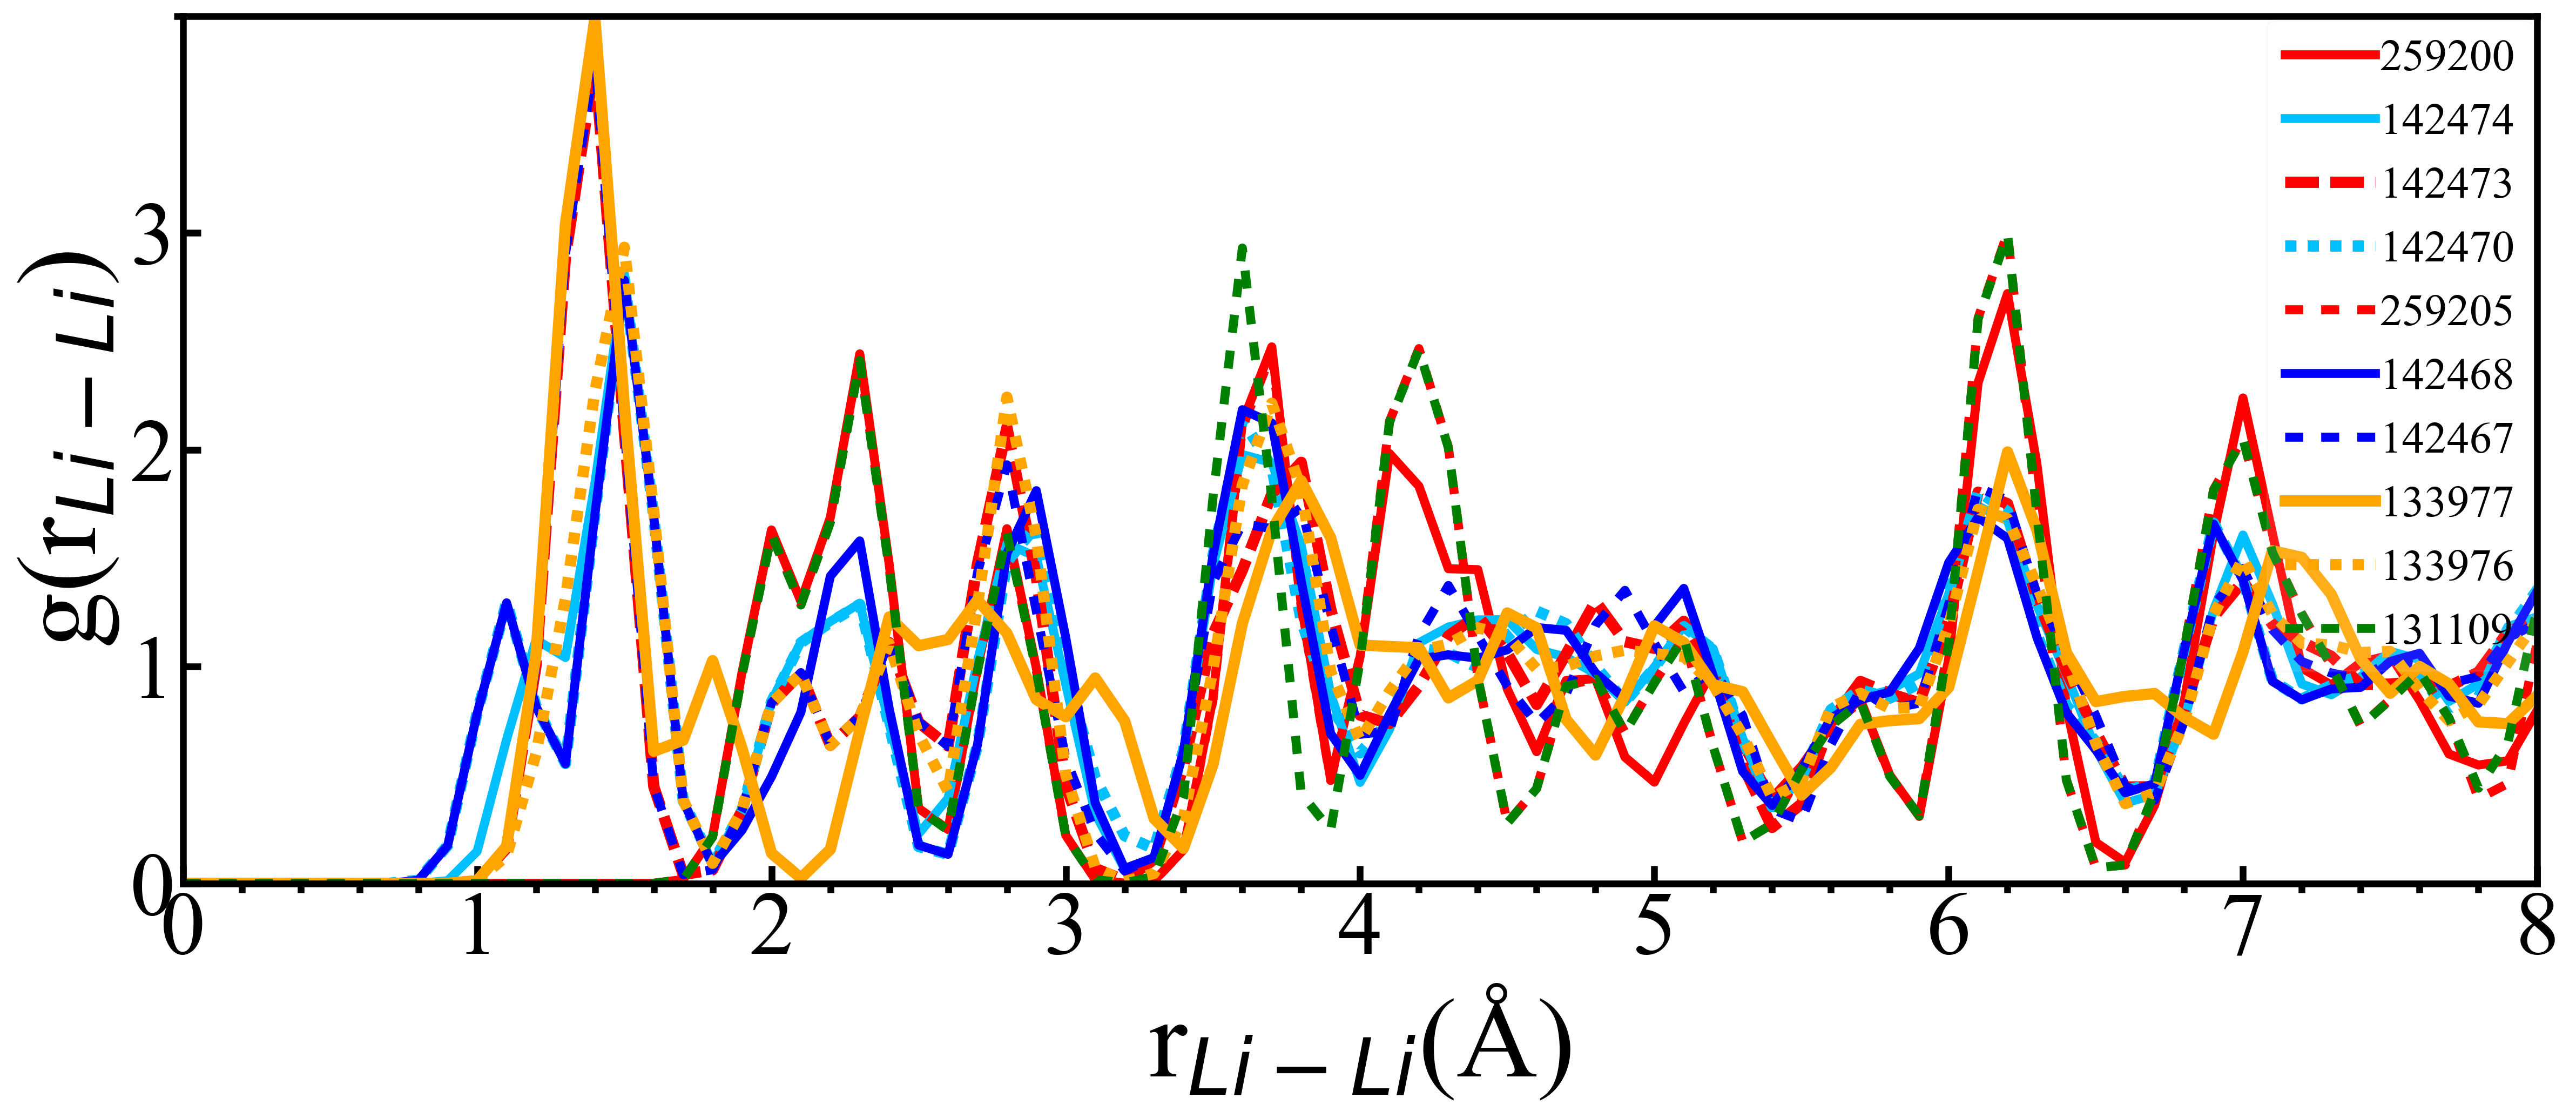

In [40]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/vasp_format/"
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    s8 = []
    s9 = []
    s10 = []
    for i in range(n_steps):
        s1+=[Structure.from_file(path+"LPSCl_CollCode259200.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file(path+"LPSCl_CollCode142474.vasp")]
    for i in range(n_steps): 
        s3+=[Structure.from_file(path+"LPSCl_CollCode142473.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file(path+"LPSCl_CollCode142470.vasp")]
    for i in range(n_steps):
        s5+=[Structure.from_file(path+"LPSCl_CollCode259205.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file(path+"LPSCl_CollCode142468.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file(path+"LPSCl_CollCode142467.vasp")]
    for i in range(n_steps): 
        s8+=[Structure.from_file(path+"LPSCl_CollCode133977.vasp")]
    for i in range(n_steps):
        s9+=[Structure.from_file(path+"LPSCl_CollCode133976.vasp")]
    for i in range(n_steps):
        s10+=[Structure.from_file(path+"LPSCl_CollCode131109.vasp")]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
    RDFF8 = RadialDistributionFunctionFast(s8,sigma=0.01)
    RDFF9 = RadialDistributionFunctionFast(s9,sigma=0.01)
    RDFF10 = RadialDistributionFunctionFast(s10,sigma=0.01)
        
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("Li","Li")
    cn_S_Li_2 = RDFF2.get_rdf("Li","Li")
    cn_S_Li_3 = RDFF3.get_rdf("Li","Li")
    cn_S_Li_4 = RDFF4.get_rdf("Li","Li")
    cn_S_Li_5 = RDFF5.get_rdf("Li","Li")
    cn_S_Li_6 = RDFF6.get_rdf("Li","Li")
    cn_S_Li_7 = RDFF7.get_rdf("Li","Li")
    cn_S_Li_8 = RDFF8.get_rdf("Li","Li")
    cn_S_Li_9 = RDFF9.get_rdf("Li","Li")
    cn_S_Li_10 = RDFF10.get_rdf("Li","Li")
    
    plt1 = pretty_plot(16,7,dpi=300)
    plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="259200",linewidth=4,c="red")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="142474",linewidth=4,c="deepskyblue")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="142473",linewidth=5,c="red",dashes=[3,1])
    plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="142470",linewidth=5,c="deepskyblue",dashes=[1,1])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="259205",linewidth=4,c="red",dashes=[2,2])
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="142468",linewidth=4,c="blue")
    plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="142467",linewidth=4,c="blue",dashes=[2,2])
    plt1.plot(cn_S_Li_8[0],cn_S_Li_8[1], label="133977",linewidth=5,c="orange")
    plt1.plot(cn_S_Li_9[0],cn_S_Li_9[1], label="133976",linewidth=5,c="orange",dashes=[1,1])
    plt1.plot(cn_S_Li_10[0],cn_S_Li_10[1], label="131109",linewidth=4,c="green",dashes=[2,2])
   
    
    plt1.ylim(0, 4)
    plt1.xlim(1, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 1, 2, 3],fontsize=40)
    plt1.xticks([0.0, 1, 2.0, 3, 4.0, 5, 6.0, 7, 8.0],fontsize=40)
    plt1.xlabel("r$_{Li-Li}$(Å)", fontsize=50)
    plt1.ylabel("g(r$_{Li-Li}$)", fontsize=50)
    plt1.tick_params(axis='both', labelsize=40, direction='in')#labelsize controls the ticklabel spacing/size
    mlx = MultipleLocator(0.2)
    mly = MultipleLocator(1)
    plt.axes().yaxis.set_minor_locator(mly)
    plt.axes().xaxis.set_minor_locator(mlx)
    plt1.tight_layout()
    plt1.savefig(fname="./Li_Li_lpscl_experimental.png",dpi=300)
    #plt1.ylabel(fontsize=40)
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


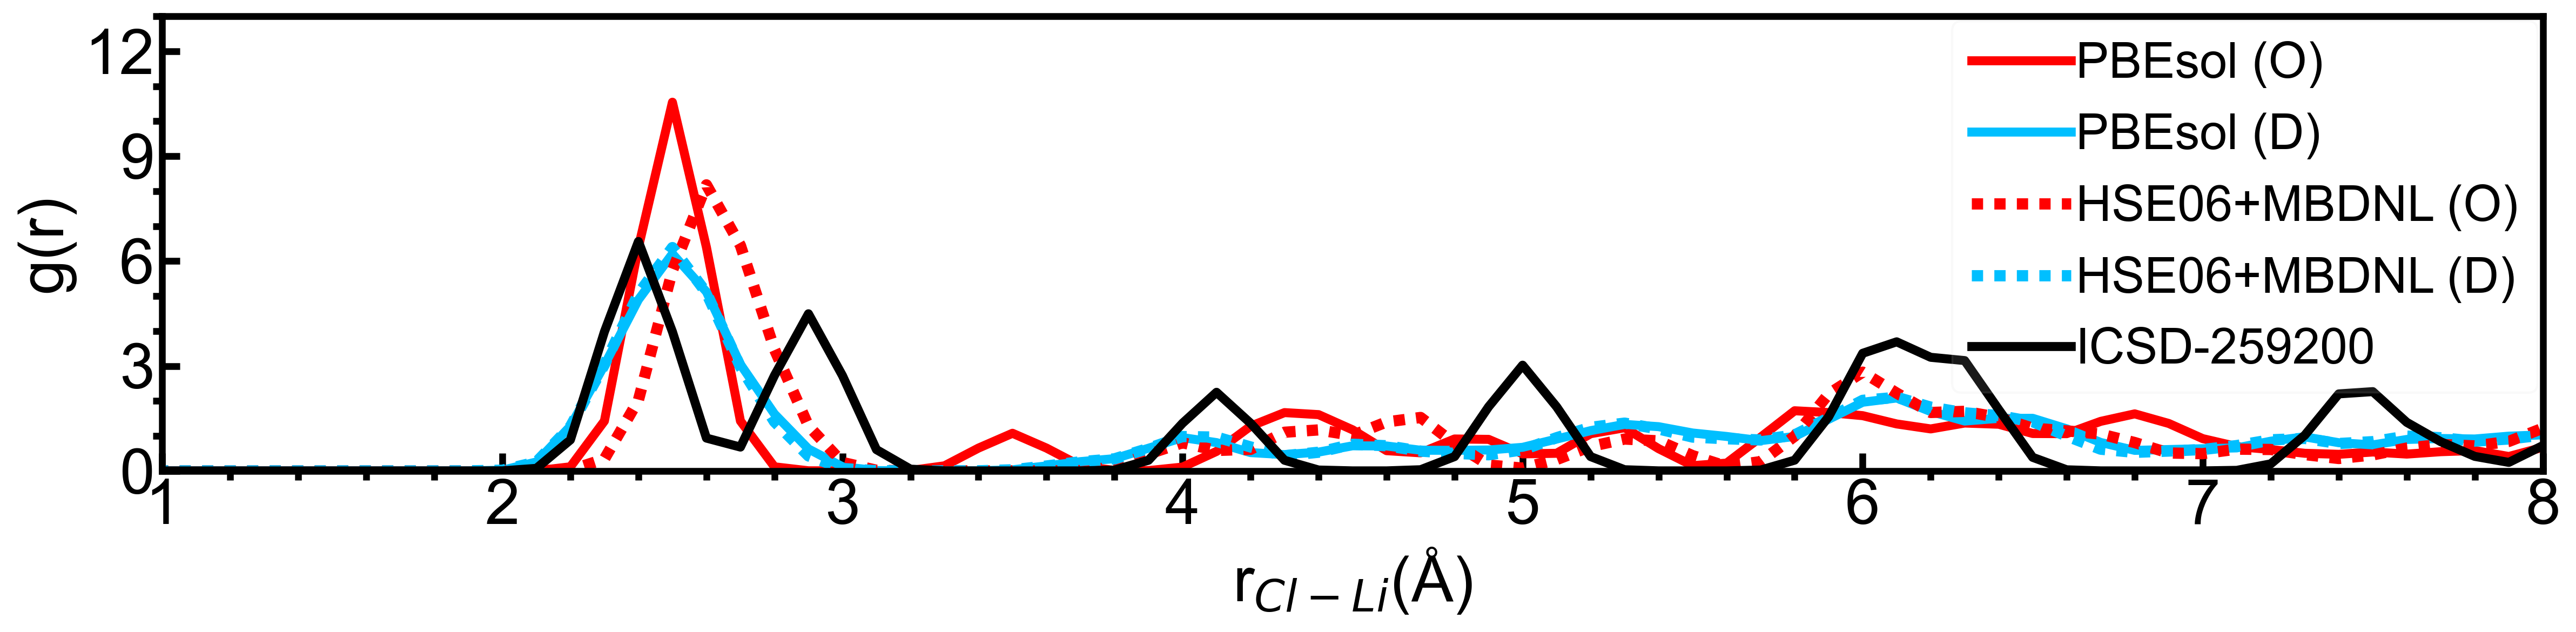

In [17]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/vasp_format/"
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    ss = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps): 
        s3+=[Structure.from_file("./pbesol_lpscl_416_intm_2.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./pbesol_lpscl_s_cl_exchanged_416_at.vasp")]
    for i in range(n_steps):
        s5=[Structure.from_file(path+"LPSCl_CollCode142474.vasp")]
        #ss.append(s)
 
    
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("Cl","Li")
    cn_S_Li_2 = RDFF2.get_rdf("Cl","Li")
    cn_S_Li_3 = RDFF3.get_rdf("Cl","Li")
    cn_S_Li_4 = RDFF4.get_rdf("Cl","Li")
    cn_S_Li_5 = RDFF5.get_rdf("Cl","Li")
    cn_S_Li_6 = RDFF2.get_rdf("Cl","Li")
    cn_S_Li_7 = RDFF3.get_rdf("Cl","Li")
    cn_S_Li_8 = RDFF4.get_rdf("Cl","Li")
    
    plt1 = pretty_plot(16,4,dpi=300)
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="PBEsol (O)",linewidth=4,c="red")
    plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="PBEsol (D)",linewidth=4,c="deepskyblue")
    plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="HSE06+MBDNL (O)",linewidth=5,c="red",dashes=[1,1])
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="HSE06+MBDNL (D)",linewidth=5,c="deepskyblue",dashes=[1,1])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="ICSD-259200",linewidth=4,c="black")
   
 
    plt1.ylim(0, 13)
    plt1.xlim(1, 8)
    plt1.legend(loc = 1, fontsize = 22, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 3, 6, 9, 12],fontsize=10)
    plt1.xticks([1.0, 2.0, 3, 4.0, 5, 6.0, 7, 8.0],fontsize=10)
    plt1.xlabel("r$_{Cl-Li}$(Å)", fontsize=28)
    plt1.ylabel("g(r)", fontsize=28)
    plt1.tick_params(axis='both', labelsize=28, direction='in')#labelsize controls the ticklabel spacing/size
    mlx = MultipleLocator(0.2)
    mly = MultipleLocator(1)
    plt.axes().yaxis.set_minor_locator(mly)
    plt.axes().xaxis.set_minor_locator(mlx)
    plt1.tight_layout()
    plt1.savefig(fname="./3_Cl_Li_lpscl_pbesol_hse_experiment.png",dpi=300)
    #plt1.ylabel(fontsize=40)
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


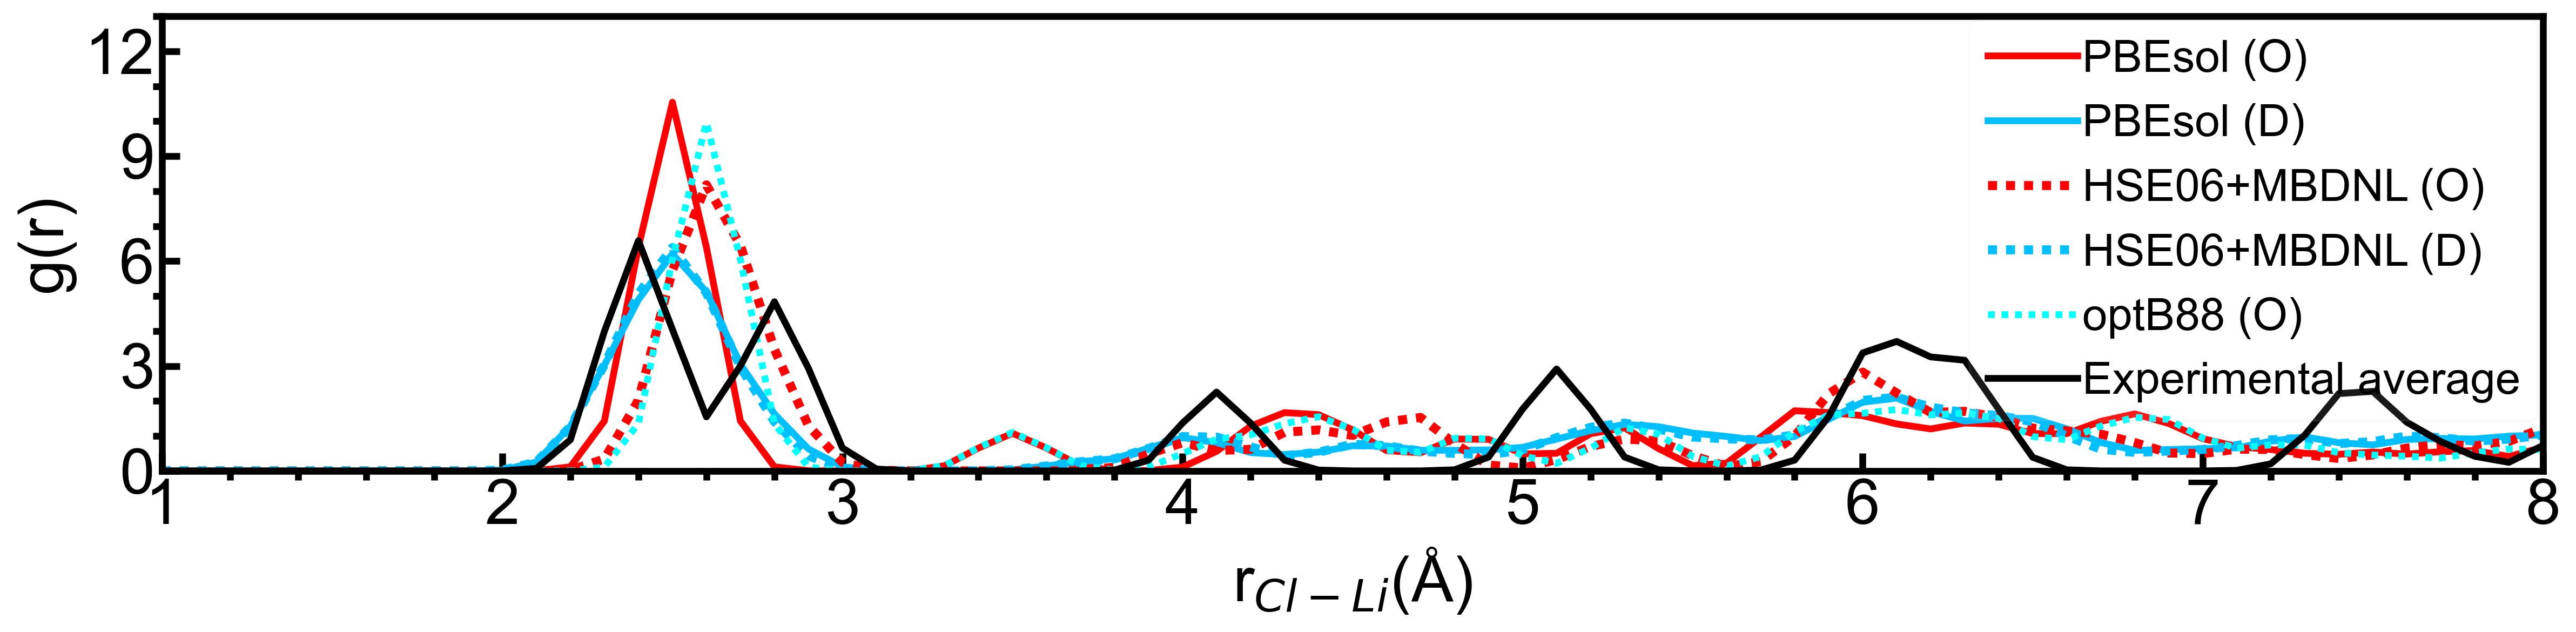

In [14]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/vasp_format/all/"
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    ss = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        #s3+=[Structure.from_file("./pbesol_lpscl_conventional_mp.vasp")]
        s3+=[Structure.from_file("./pbesol_lpscl_416_intm_2.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./pbesol_lpscl_s_cl_exchanged_416_at.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./LiPSCl_optb88_opt.vasp")]
        #s6+=[Structure.from_file("./pbesol_lpscl_conventional_mp.vasp")]
    for i in range(4,10):
        s5=[Structure.from_file(filename = path+str(i)+".vasp")]
        #ss.append(s)
 
    
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("Cl","Li")
    cn_S_Li_2 = RDFF2.get_rdf("Cl","Li")
    cn_S_Li_3 = RDFF3.get_rdf("Cl","Li")
    cn_S_Li_4 = RDFF4.get_rdf("Cl","Li")
    cn_S_Li_5 = RDFF5.get_rdf("Cl","Li")
    cn_S_Li_6 = RDFF6.get_rdf("Cl","Li")
    cn_S_Li_7 = RDFF3.get_rdf("Cl","Li")
    cn_S_Li_8 = RDFF4.get_rdf("Cl","Li")
    
    plt1 = pretty_plot(16,4,dpi=300)
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="PBEsol (O)",linewidth=3,c="red")
    plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="PBEsol (D)",linewidth=3,c="deepskyblue")
    plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="HSE06+MBDNL (O)",linewidth=4,c="red",dashes=[1,1])
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="HSE06+MBDNL (D)",linewidth=4,c="deepskyblue",dashes=[1,1])
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="optB88 (O)",linewidth=3,c="cyan",dashes=[1,1])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="Experimental average",linewidth=3,c="black")
   
 
    plt1.ylim(0, 13)
    plt1.xlim(1, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 3, 6, 9, 12],fontsize=10)
    plt1.xticks([1.0, 2.0, 3, 4.0, 5, 6.0, 7, 8.0],fontsize=10)
    plt1.xlabel("r$_{Cl-Li}$(Å)", fontsize=28)
    plt1.ylabel("g(r)", fontsize=28)
    plt1.tick_params(axis='both', labelsize=28, direction='in')#labelsize controls the ticklabel spacing/size
    mlx = MultipleLocator(0.2)
    mly = MultipleLocator(1)
    plt.axes().yaxis.set_minor_locator(mly)
    plt.axes().xaxis.set_minor_locator(mlx)
    plt1.tight_layout()
    plt1.savefig(fname="./2_Cl_Li_lpscl_optb88_pbesol_hse_experiment.png",dpi=300)
    #plt1.ylabel(fontsize=40)
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


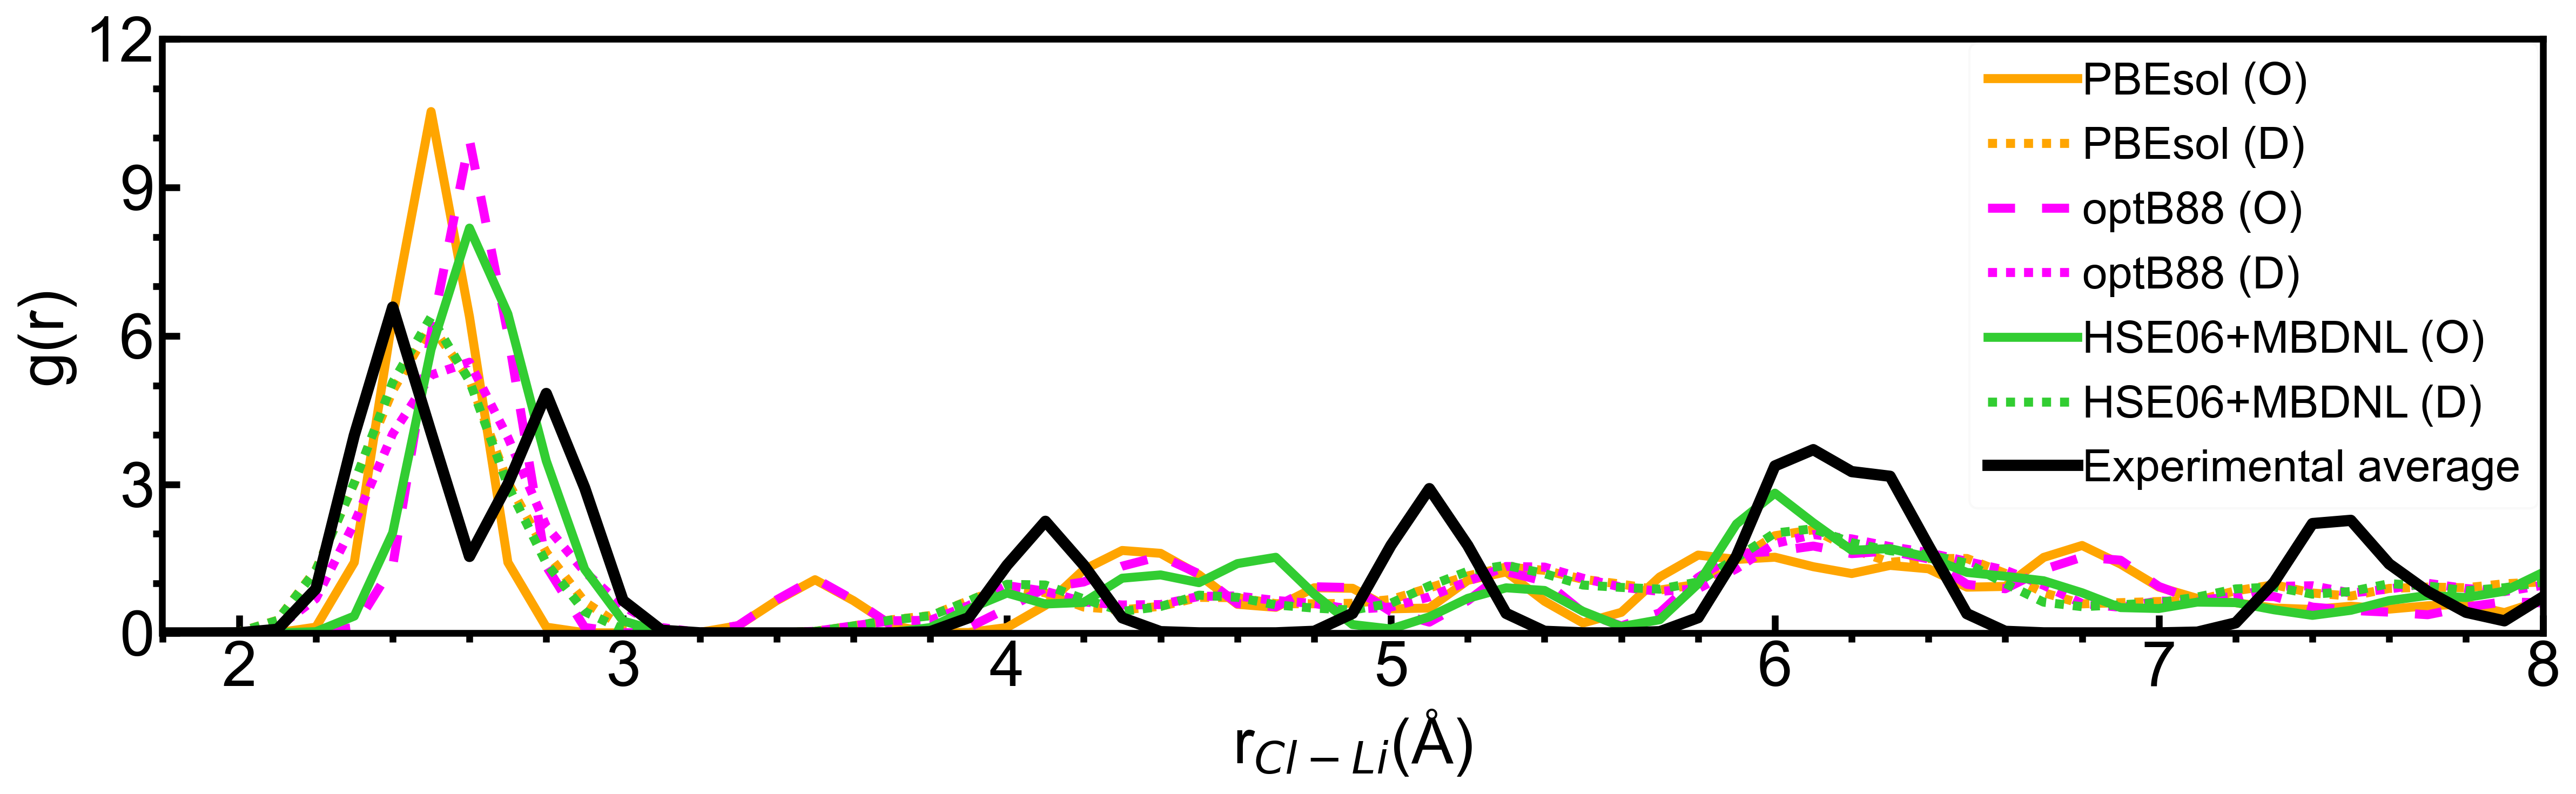

In [9]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/vasp_format/all/"
from matplotlib.ticker import MultipleLocator
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    s8 = []
    s9 = []
    s10 = []
    s11 = []
    ss = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        s3+=[Structure.from_file("./pbesol_lpscl_conventional_mp.vasp")]
        #s3+=[Structure.from_file("./pbesol_lpscl_416_intm_2.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./pbesol_lpscl_s_cl_exchanged_416_at.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./LiPSCl_optb88_opt.vasp")]
        #s6+=[Structure.from_file("./pbesol_lpscl_conventional_mp.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file("./LiPSCl_ex_optB88-opt.vasp")]
        #s6+=[Structure.from_file("./pbesol_lpscl_conventional_mp.vasp")]
    for i in range(4,10):
        s5=[Structure.from_file(filename = path+str(i)+".vasp")]
        #ss.append(s)
    for i in range(n_steps):
        s8+=[Structure.from_file("./lpscl_conventional_hse06_ts.vasp")]
    for i in range(n_steps):
        s9+=[Structure.from_file("./lpscl_hse_ts_s_cl_exchanges_416_at.vasp")]
    for i in range(n_steps):
        s10+=[Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/PBE-HSE-D3/lpscl-hsed3.vasp")]
    for i in range(n_steps):
        s11+=[Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/PBE-HSE-D3/LPSCL-PBED3.vasp")]
    
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
    RDFF8 = RadialDistributionFunctionFast(s8,sigma=0.01)
    RDFF9 = RadialDistributionFunctionFast(s9,sigma=0.01)
    RDFF10 = RadialDistributionFunctionFast(s10,sigma=0.01)
    RDFF11 = RadialDistributionFunctionFast(s11,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("Cl","Li")
    cn_S_Li_2 = RDFF2.get_rdf("Cl","Li")
    cn_S_Li_3 = RDFF3.get_rdf("Cl","Li")
    cn_S_Li_4 = RDFF4.get_rdf("Cl","Li")
    cn_S_Li_5 = RDFF5.get_rdf("Cl","Li")
    cn_S_Li_6 = RDFF6.get_rdf("Cl","Li")
    cn_S_Li_7 = RDFF7.get_rdf("Cl","Li")
    cn_S_Li_8 = RDFF8.get_rdf("Cl","Li")
    cn_S_Li_9 = RDFF9.get_rdf("Cl","Li")
    cn_S_Li_8 = RDFF8.get_rdf("Cl","Li")
    cn_S_Li_9 = RDFF9.get_rdf("Cl","Li")
    cn_S_Li_10 = RDFF10.get_rdf("Cl","Li")
    cn_S_Li_11 = RDFF11.get_rdf("Cl","Li")
    
    plt1 = pretty_plot(16,5,dpi=300)
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="PBEsol (O)",linewidth=4,c="orange")
    plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="PBEsol (D)",linewidth=4,c="orange",dashes=[1,1])
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="optB88 (O)",linewidth=4,c="magenta",dashes=[3,3])
    plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="optB88 (D)",linewidth=4,c="magenta",dashes=[1,1])
    #plt1.plot(cn_S_Li_8[0],cn_S_Li_8[1], label="HSE06+TS (O)",linewidth=3,c="orange")
    #plt1.plot(cn_S_Li_9[0],cn_S_Li_9[1], label="HSE06+TS (D)",linewidth=3,c="orange",dashes=[1,1])
    plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="HSE06+MBDNL (O)",linewidth=4,c="limegreen")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="HSE06+MBDNL (D)",linewidth=4,c="limegreen",dashes=[1,1])
    #plt1.plot(cn_S_Li_10[0],cn_S_Li_10[1], label="HSE06+D3 (O)",linewidth=4,c="magenta",dashes=[1,1])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="Experimental average",linewidth=5,c="black")
    #plt1.plot(cn_S_Li_11[0],cn_S_Li_11[1], label="PBE+D3 (O)",linewidth=4,c="purple")
   
    plt1.ylim(0, 12)
    plt1.xlim(1.8, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 3, 6, 9, 12],fontsize=10)
    plt1.xticks([2.0, 3, 4.0, 5, 6.0, 7, 8.0],fontsize=10)
    plt1.xlabel("r$_{Cl-Li}$(Å)", fontsize=28)
    plt1.ylabel("g(r)", fontsize=28)
    plt1.tick_params(axis='both', labelsize=28, direction='in')#labelsize controls the ticklabel spacing/size
    mlx = MultipleLocator(0.2)
    mly = MultipleLocator(1)
    plt.axes().yaxis.set_minor_locator(mly)
    plt.axes().xaxis.set_minor_locator(mlx)
    plt1.tight_layout()
    plt1.savefig(fname="./5_Cl_Li_lpscl_optb88_pbesol_hse_experiment.png",dpi=300)
    #plt1.ylabel(fontsize=40)
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

# Volume prediction is well done by PBEsol but the local Li-Cl bond and Li-Li correlation

In [21]:
s1=Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/LPSCl_CollCode259200.vasp")
s2=Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/LPSCl_CollCode142474.vasp")

s3=Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/LPSCl_CollCode142473.vasp")
s4=Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/LPSCl_CollCode142470.cif")

s5=Structure.from_file("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/LPSCl_CollCode259205.vasp")
    

In [ ]:
ss=[]
    ces=[]
    ave_CNs=[]
    for i in range(9):
        
        #s = MD.get_structure(md_id = 1103, config_id = 1, temp = temp, step = 30000+(i*(20000/ns)))
        s = Structure.from_file("./nzc-str-{}.cif".format(i))
        ss.append(s)

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


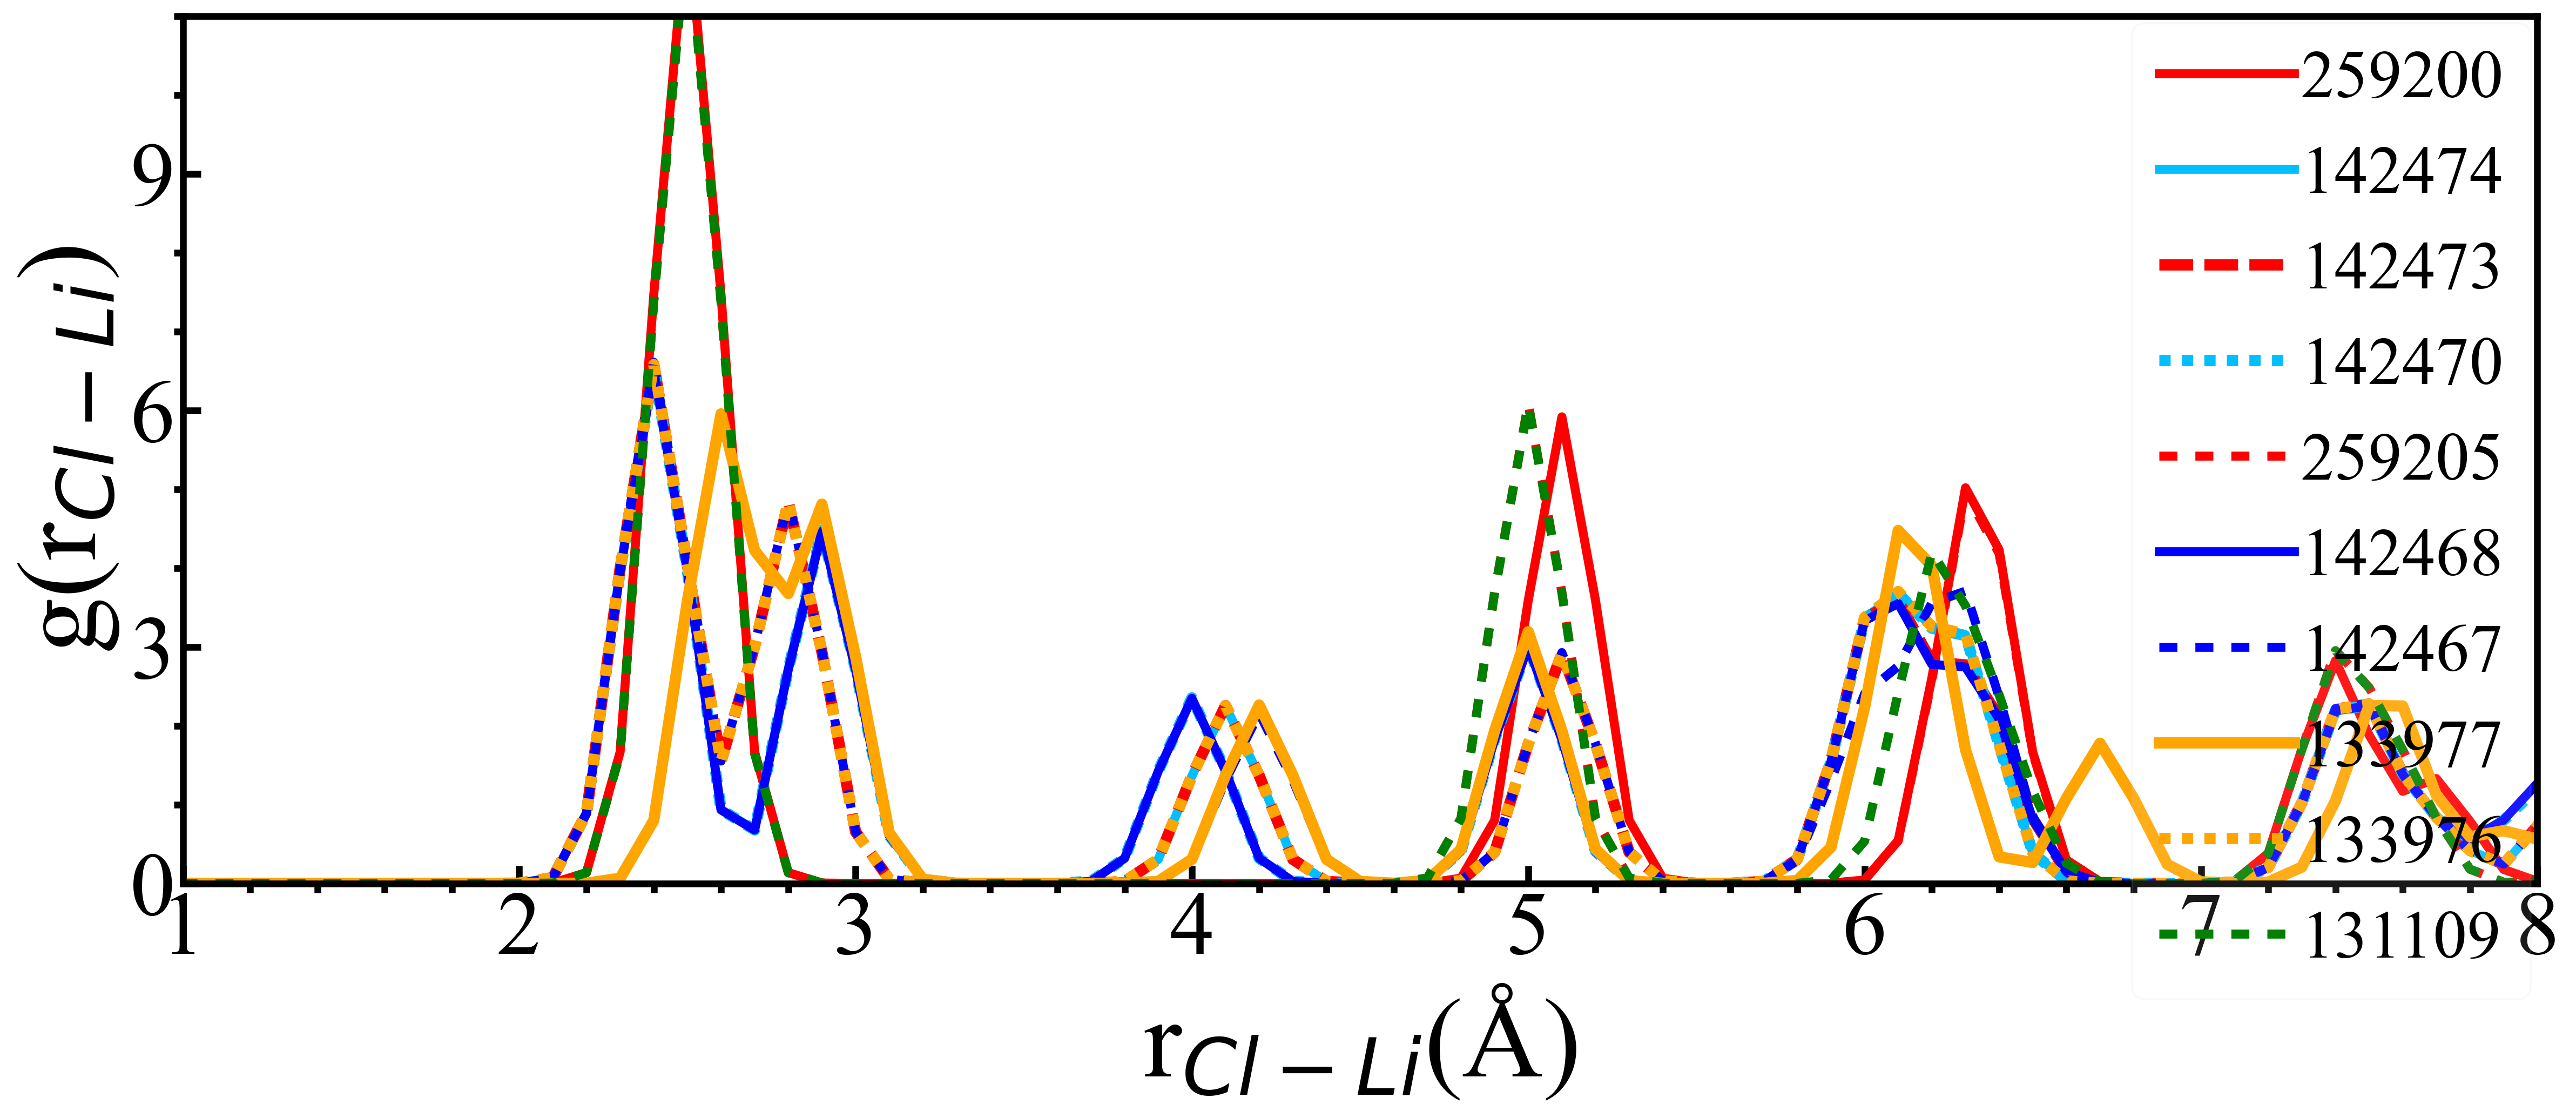

0


/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


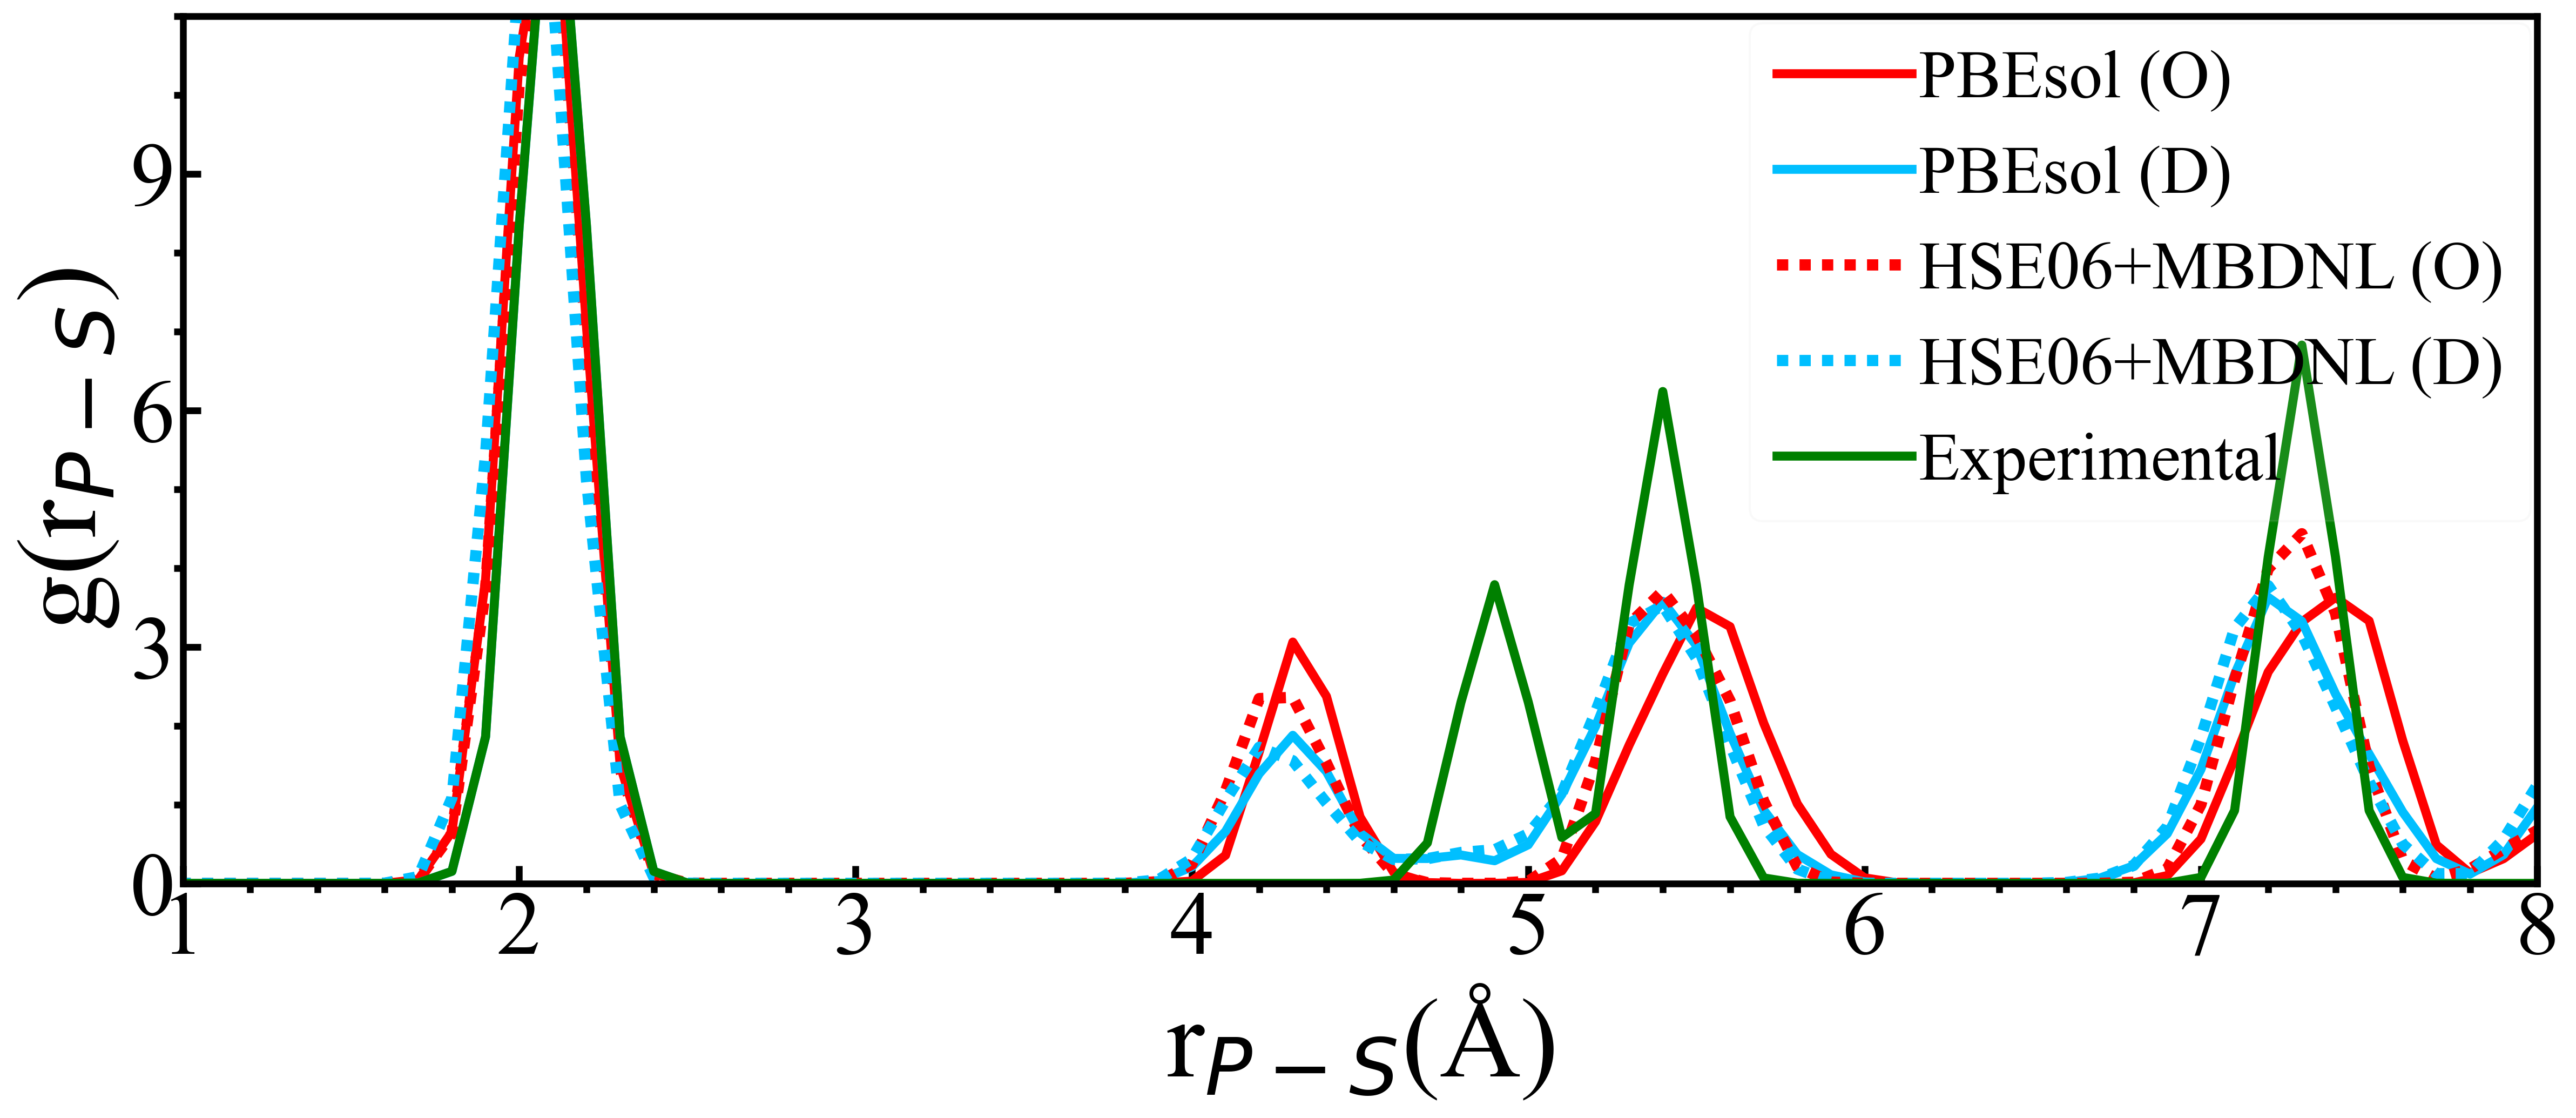

In [24]:
path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/geom/LPSCl_cif_experimental/vasp_format/all/"
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    ss = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps): 
        s3+=[Structure.from_file("./pbesol_lpscl_416_intm_2.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./pbesol_lpscl_s_cl_exchanged_416_at.vasp")]
    for i in range(4,10):
        s5=[Structure.from_file(filename = path+str(i)+".vasp")]
        #ss.append(s)
 
    
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("P","S")
    cn_S_Li_2 = RDFF2.get_rdf("P","S")
    cn_S_Li_3 = RDFF3.get_rdf("P","S")
    cn_S_Li_4 = RDFF4.get_rdf("P","S")
    cn_S_Li_5 = RDFF5.get_rdf("P","S")
    cn_S_Li_6 = RDFF2.get_rdf("Li","Li")
    cn_S_Li_7 = RDFF3.get_rdf("Li","Li")
    cn_S_Li_8 = RDFF4.get_rdf("Li","Li")
    
    plt1 = pretty_plot(16,7,dpi=300)
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="PBEsol (O)",linewidth=4,c="red")
    plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="PBEsol (D)",linewidth=4,c="deepskyblue")
    plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="HSE06+MBDNL (O)",linewidth=5,c="red",dashes=[1,1])
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="HSE06+MBDNL (D)",linewidth=5,c="deepskyblue",dashes=[1,1])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="Experimental",linewidth=4,c="green")
   
 
    plt1.ylim(0, 11)
    plt1.xlim(1, 8)
    plt1.legend(loc = 1, fontsize = 30, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 3, 6, 9],fontsize=40)
    plt1.xticks([1.0, 2.0, 3, 4.0, 5, 6.0, 7, 8.0],fontsize=40)
    plt1.xlabel("r$_{P-S}$(Å)", fontsize=50)
    plt1.ylabel("g(r$_{P-S}$)", fontsize=50)
    plt1.tick_params(axis='both', labelsize=40, direction='in')#labelsize controls the ticklabel spacing/size
    mlx = MultipleLocator(0.2)
    mly = MultipleLocator(1)
    plt.axes().yaxis.set_minor_locator(mly)
    plt.axes().xaxis.set_minor_locator(mlx)
    plt1.tight_layout()
    plt1.savefig(fname="./2_P_S_lpscl_pbesol_hse_experiment.png",dpi=300)
    #plt1.ylabel(fontsize=40)
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

# PBEsol Functional Results

/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/swastika/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


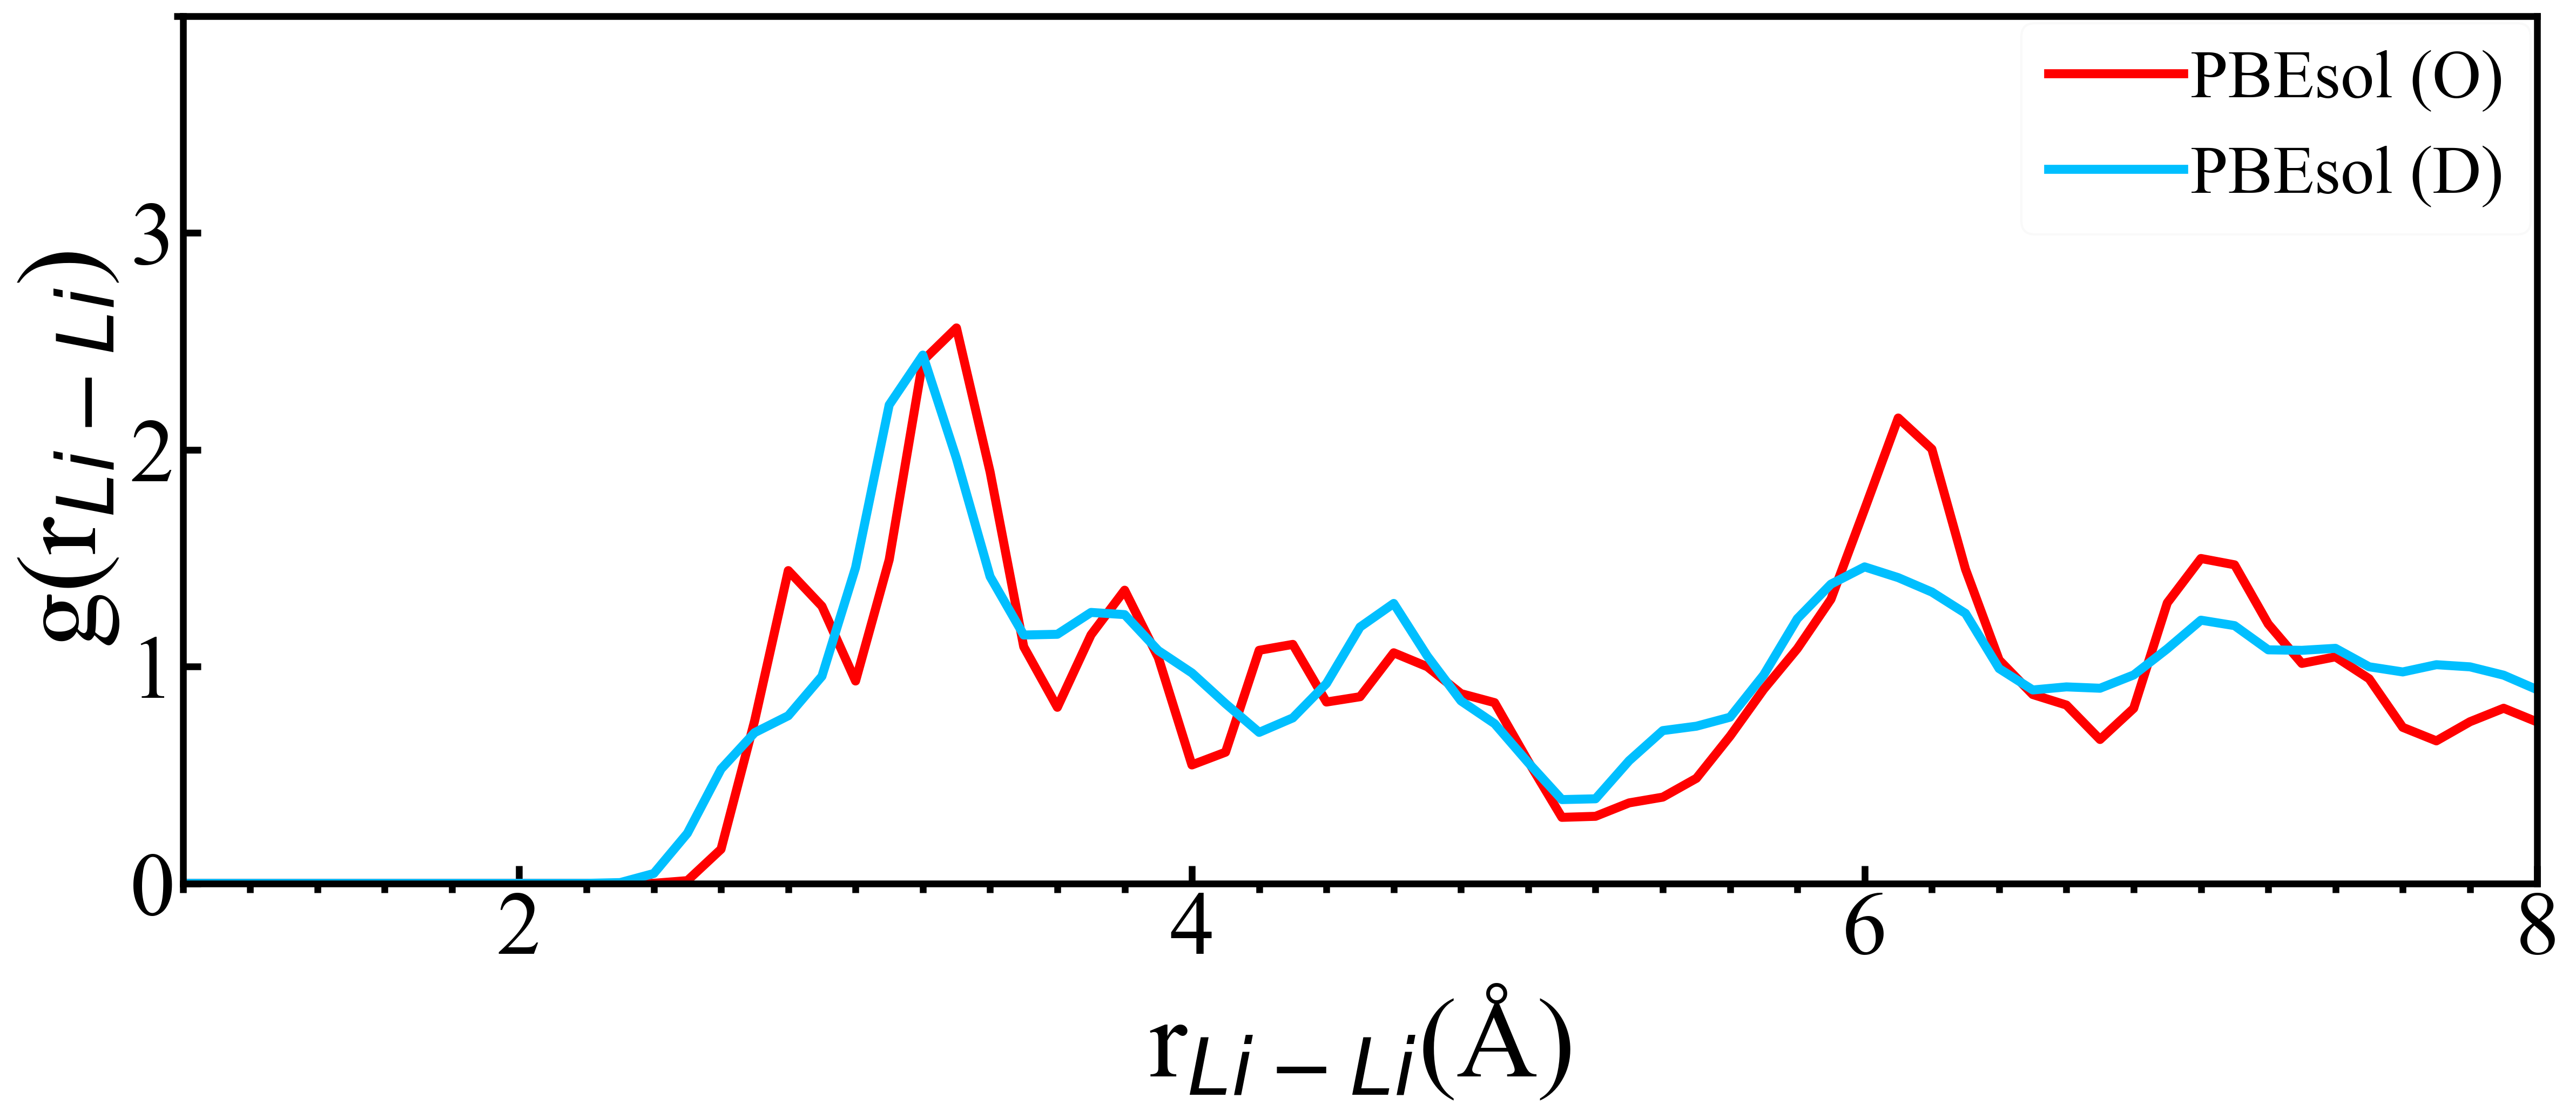

In [19]:
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s8 = []
    s9 = []
    s10 = []
    for i in range(n_steps):
        s8+=[Structure.from_file("./pbesol_lpscl_416_intm_2.vasp")]
    for i in range(n_steps):
        s9+=[Structure.from_file("./lpscl_hse_ts_s_cl_exchanges_416_at.vasp")]
    for i in range(n_steps):
        s10+=[Structure.from_file("./pbesol_lpscl_s_cl_exchanged_416_at.vasp")]
    

    RDFF8 = RadialDistributionFunctionFast(s8,sigma=0.01)
    RDFF9 = RadialDistributionFunctionFast(s9,sigma=0.01)
    RDFF10 = RadialDistributionFunctionFast(s10,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_8 = RDFF8.get_rdf("Li","Li")
    cn_S_Li_10 = RDFF10.get_rdf("Li","Li")
    
    plt1 = pretty_plot(16,7,dpi=300)
    #plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="LPSCl-416",linewidth=3,c="orange")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex-416",linewidth=3,c="green")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSCl-pbesol",linewidth=3,c="red",dashes=[2,2])
    #plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="LPSCl-pbesol-ex",linewidth=3,c="yellow",dashes=[2,2])
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="HSE06+TS (O)",linewidth=4,color="darkorange")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPSCl-TS-ex",linewidth=3,color="maroon")
    # c r m y 
    #plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="LPSCl-TS",linewidth=3,c="blue")
    plt1.plot(cn_S_Li_8[0],cn_S_Li_8[1], label="PBEsol (O)",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_9[0],cn_S_Li_9[1], label="HSE06+TS (D)",linewidth=4,c="deepskyblue")
    plt1.plot(cn_S_Li_10[0],cn_S_Li_10[1], label="PBEsol (D)",linewidth=4,c="deepskyblue")
    #plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=2,c="lightgreen")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=2,c="mediumpurple")
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=2,color="violet")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=2,color="lightcoral")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 4)
    plt1.xlim(1, 8)
    plt1.legend(loc = 1, fontsize = 30, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 1.0, 2.0, 3.0],fontsize=40)
    plt1.xticks([2.0, 4.0, 6.0, 8.0],fontsize=40)
    plt1.xlabel("r$_{Li-Li}$(Å)", fontsize=50)
    plt1.ylabel("g(r$_{Li-Li}$)", fontsize=50)
    plt1.tick_params(axis='both', labelsize=40, direction='in')#labelsize controls the ticklabel spacing/size
    mlx = MultipleLocator(0.2)
    mly = MultipleLocator(1)
    plt.axes().yaxis.set_minor_locator(mly)
    plt.axes().xaxis.set_minor_locator(mlx)
    plt1.tight_layout()
    plt1.savefig(fname="./li_li_lpscl_pbesol.png",dpi=300)
    #plt1.ylabel(fontsize=40)
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

# HSE Functional Results

# PBE Functional Results

CPU times: user 2.41 s, sys: 158 ms, total: 2.57 s
Wall time: 1.87 s


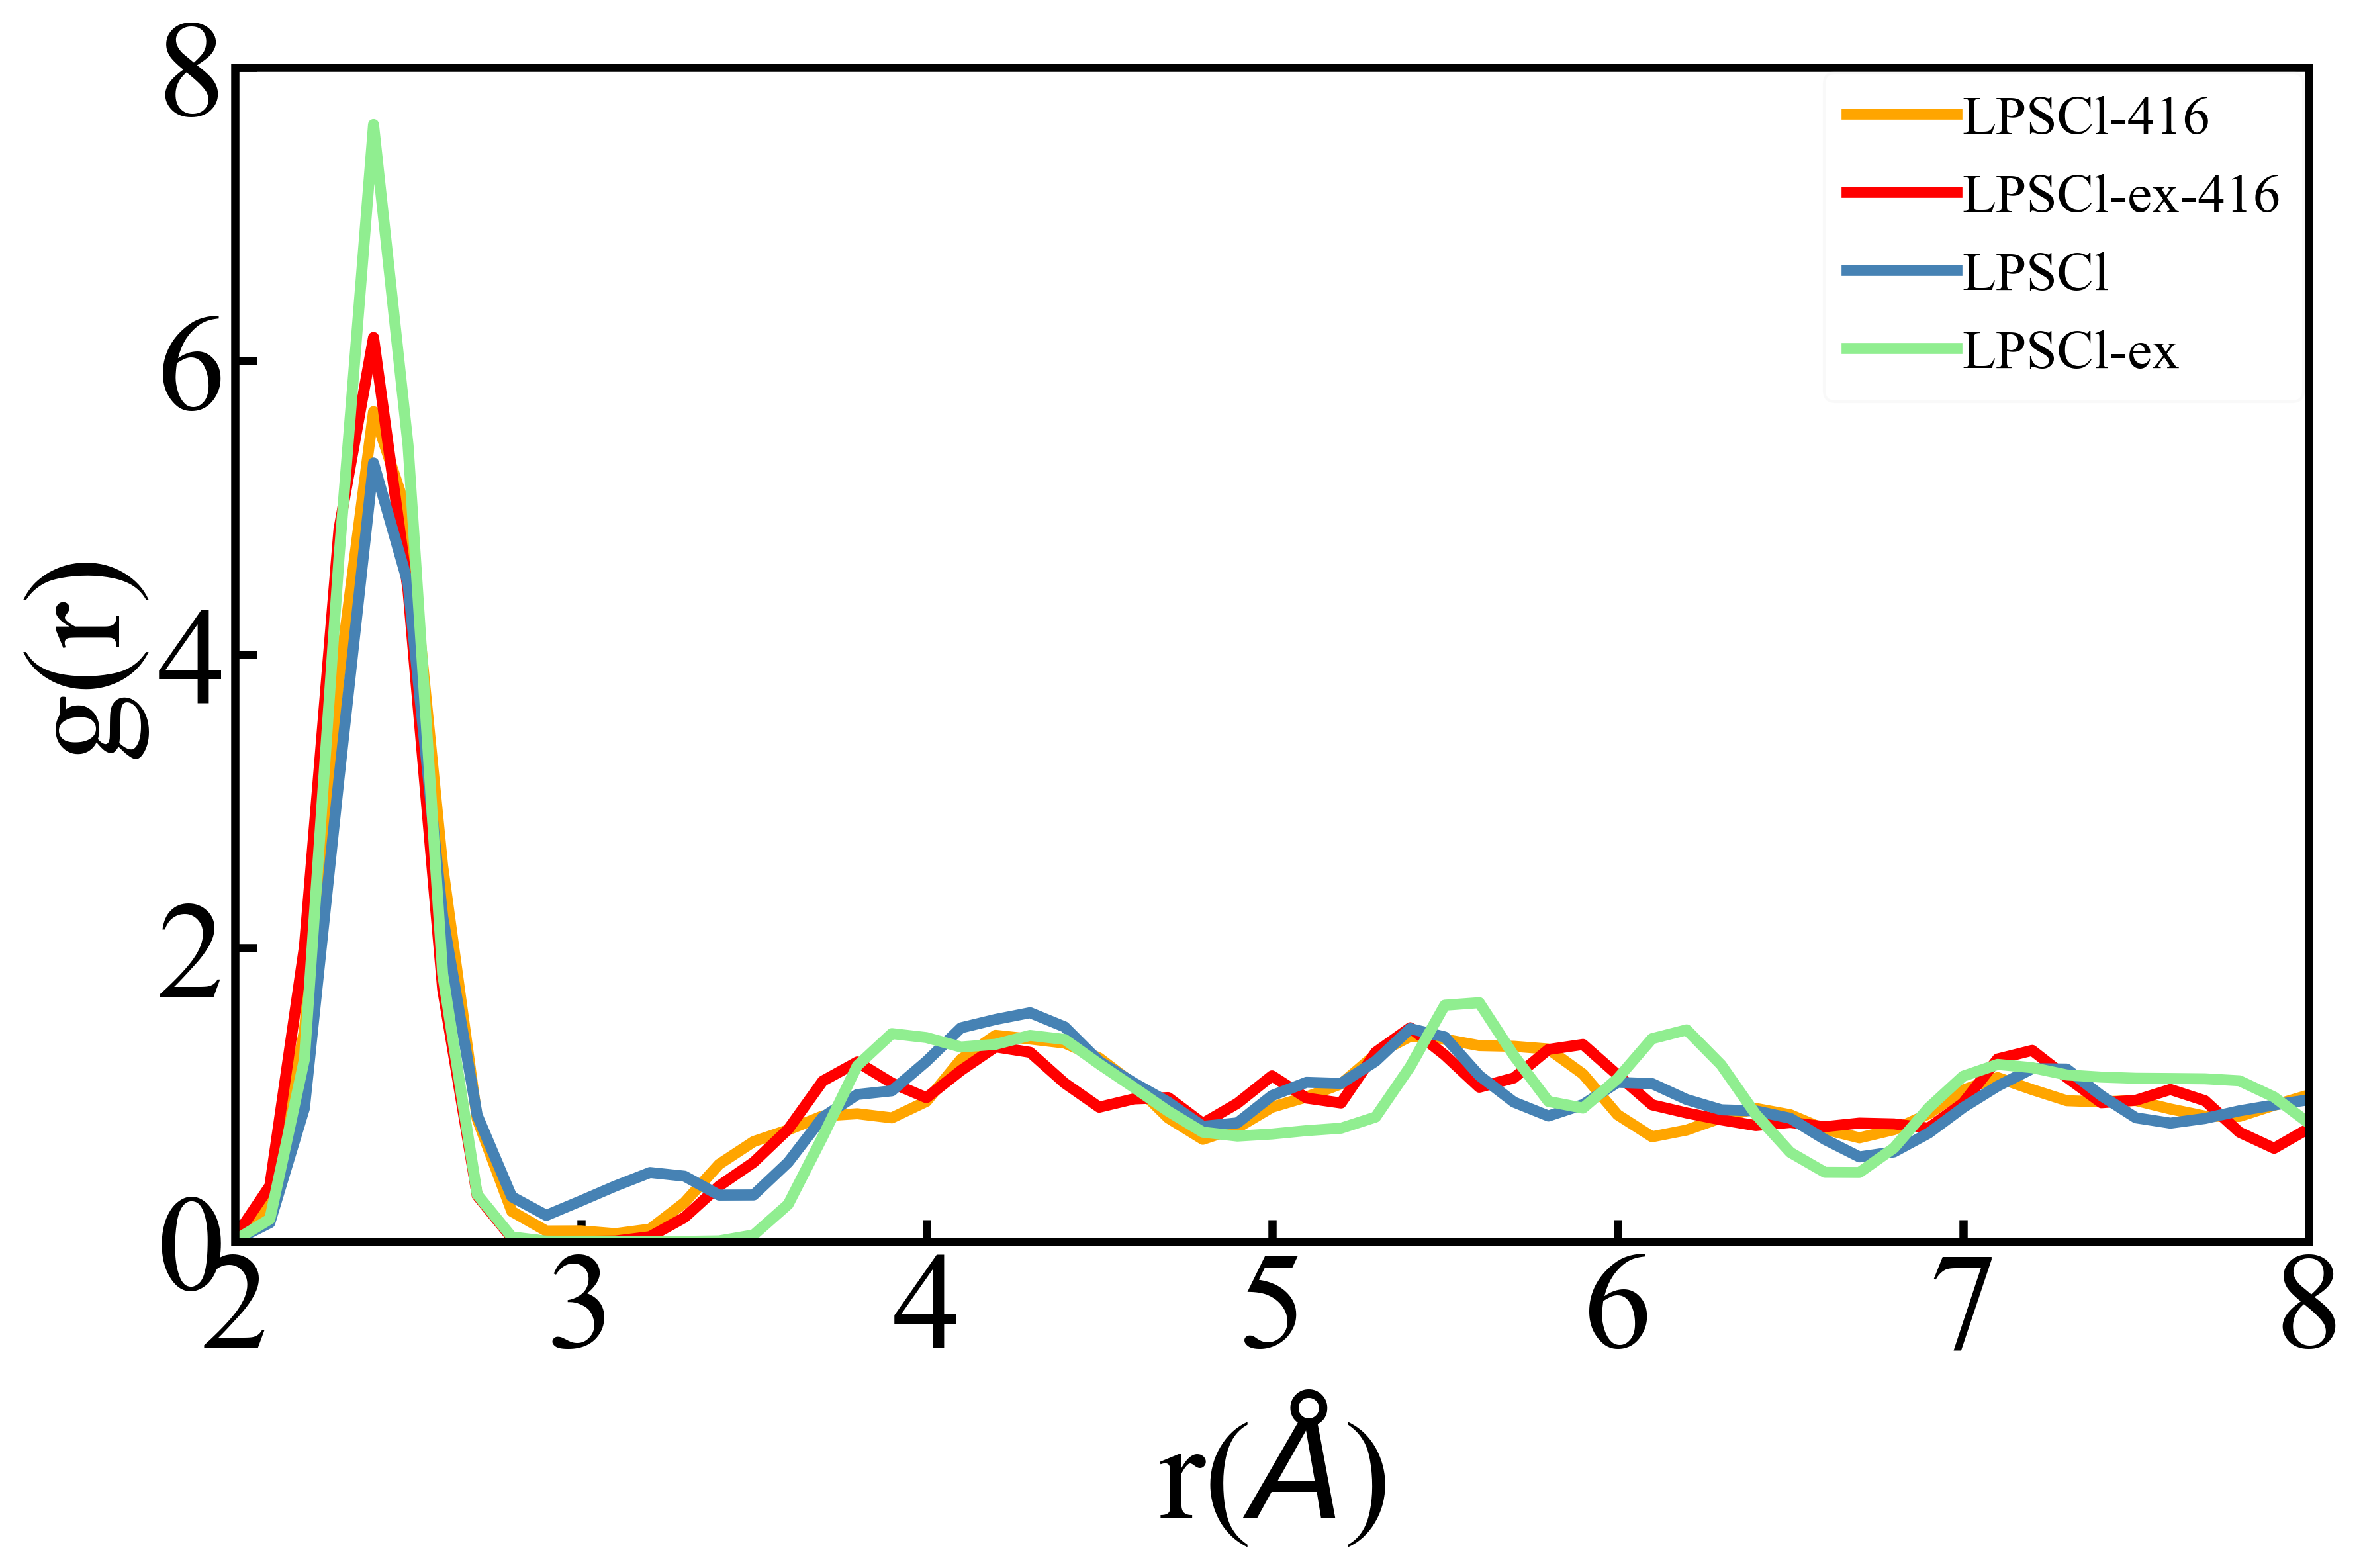

In [8]:
%%time
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

In [5]:
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        s3+=[Structure.from_file("./lpscl_conventional_mp_hse06_mbd_nl_tight.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./lpscl_hse_06_mbdnl_s_cl_exchanged_unitcell.vasp")]
    for i in range(n_steps):
        s5+=[Structure.from_file("./lpsclbr_with_exchange_hse06_mbd_nl_392_atom.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./lp_ge_si_hseo6_mbdnl_light_424.POSCAR.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file("./lpsi_hse_06_mbd_nl_tight.in.vasp")]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("S","Li")
    cn_S_Li_2 = RDFF2.get_rdf("S","Li")
    cn_S_Li_3 = RDFF3.get_rdf("S","Li")
    cn_S_Li_4 = RDFF4.get_rdf("S","Li")
    cn_S_Li_5 = RDFF5.get_rdf("S","Li")
    cn_S_Li_6 = RDFF6.get_rdf("S","Li")
    cn_S_Li_7 = RDFF7.get_rdf("S","Li")
    #cn_O_Li_4 = RDFF4.get_rdf("S","Li")
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="LPSCl",linewidth=3,c="black")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-408-atom",linewidth=4,c="orange")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSCl-ex-408-atom",linewidth=4,c="r")
    #plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="LPSI-ex",linewidth=2,c="red",dashes=[2,2])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSCl",linewidth=4,color="steelblue")
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPSCl-ex",linewidth=4,color="lightgreen")
    # c r m y 
    #plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="LPSI-unitcell",linewidth=3,c="c")
    #plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=2,c="lightgreen")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=2,c="mediumpurple")
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=2,color="violet")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=2,color="lightcoral")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 8)
    plt1.xlim(2, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 2.0, 4.0, 6.0, 8.0],fontsize=50)
    plt1.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./lpscl_gor_all_functional.png",dpi=300)
    #plt1.ylabel(fontsize=40)

def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        s3+=[Structure.from_file("./lpscl_conventional_mp_hse06_mbd_nl_tight.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./lpscl_hse_06_mbdnl_s_cl_exchanged_unitcell.vasp")]
    for i in range(n_steps):
        s5+=[Structure.from_file("./lpsclbr_with_exchange_hse06_mbd_nl_392_atom.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./lp_ge_si_hseo6_mbdnl_light_424.POSCAR.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file("./lpsi_hse_06_mbd_nl_tight.in.vasp")]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("S","Li")
    cn_S_Li_2 = RDFF2.get_rdf("S","Li")
    cn_S_Li_3 = RDFF3.get_rdf("S","Li")
    cn_S_Li_4 = RDFF4.get_rdf("S","Li")
    cn_S_Li_5 = RDFF5.get_rdf("S","Li")
    cn_S_Li_6 = RDFF6.get_rdf("S","Li")
    cn_S_Li_7 = RDFF7.get_rdf("S","Li")
    #cn_O_Li_4 = RDFF4.get_rdf("S","Li")
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="LPSCl",linewidth=3,c="black")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl",linewidth=4,c="orange")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI-ex",linewidth=4,c="r")
    #plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="LPSI-ex",linewidth=2,c="red",dashes=[2,2])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=4,color="steelblue")
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=4,color="lightgreen")
    # c r m y 
    #plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="LPSI-unitcell",linewidth=3,c="c")
    #plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=2,c="lightgreen")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=2,c="mediumpurple")
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=2,color="violet")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=2,color="lightcoral")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 8)
    plt1.xlim(2, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 2.0, 4.0, 6.0, 8.0],fontsize=50)
    plt1.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./lpscl_gor_all_functional.png",dpi=300)
    #plt1.ylabel(fontsize=40)

In [9]:
s = Structure.from_file("./lpsi_hse_06_mbd_nl_tight.in.vasp")

In [53]:
for i in range(4):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    a = np.round(np.clip(np.random.rand(), 0, 1), 1)

In [6]:
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        s3+=[Structure.from_file("./lpsi_hse_06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./lpsi_s_i_exchanged_hse_06_mbd_nl.vasp")]
    for i in range(n_steps):
        s5+=[Structure.from_file("./lpsclbr_with_exchange_hse06_mbd_nl_392_atom.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./lp_ge_si_hseo6_mbdnl_light_424.POSCAR.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file("./lpsi_hse_06_mbd_nl_tight.in.vasp")]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("S","Li")
    cn_S_Li_2 = RDFF2.get_rdf("S","Li")
    cn_S_Li_3 = RDFF3.get_rdf("S","Li")
    cn_S_Li_4 = RDFF4.get_rdf("S","Li")
    cn_S_Li_5 = RDFF5.get_rdf("S","Li")
    cn_S_Li_6 = RDFF6.get_rdf("S","Li")
    cn_S_Li_7 = RDFF7.get_rdf("S","Li")
    #cn_O_Li_4 = RDFF4.get_rdf("S","Li")
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="LPSCl",linewidth=3,c="black")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=4,c="orange")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=4,c="r")
    #plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="LPSI-ex",linewidth=2,c="red",dashes=[2,2])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=4,color="steelblue")
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=4,color="lightgreen")
    # c r m y 
    #plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="LPSI-unitcell",linewidth=3,c="c")
    #plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=2,c="lightgreen")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=2,c="mediumpurple")
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=2,color="violet")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=2,color="lightcoral")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 8)
    plt1.xlim(2, 8)
    plt1.legend(loc = 1, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 2.0, 4.0, 6.0, 8.0],fontsize=50)
    plt1.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./600_S_LI_composition.png",dpi=300)
    #plt1.ylabel(fontsize=40)

CPU times: user 2.21 s, sys: 150 ms, total: 2.36 s
Wall time: 1.76 s


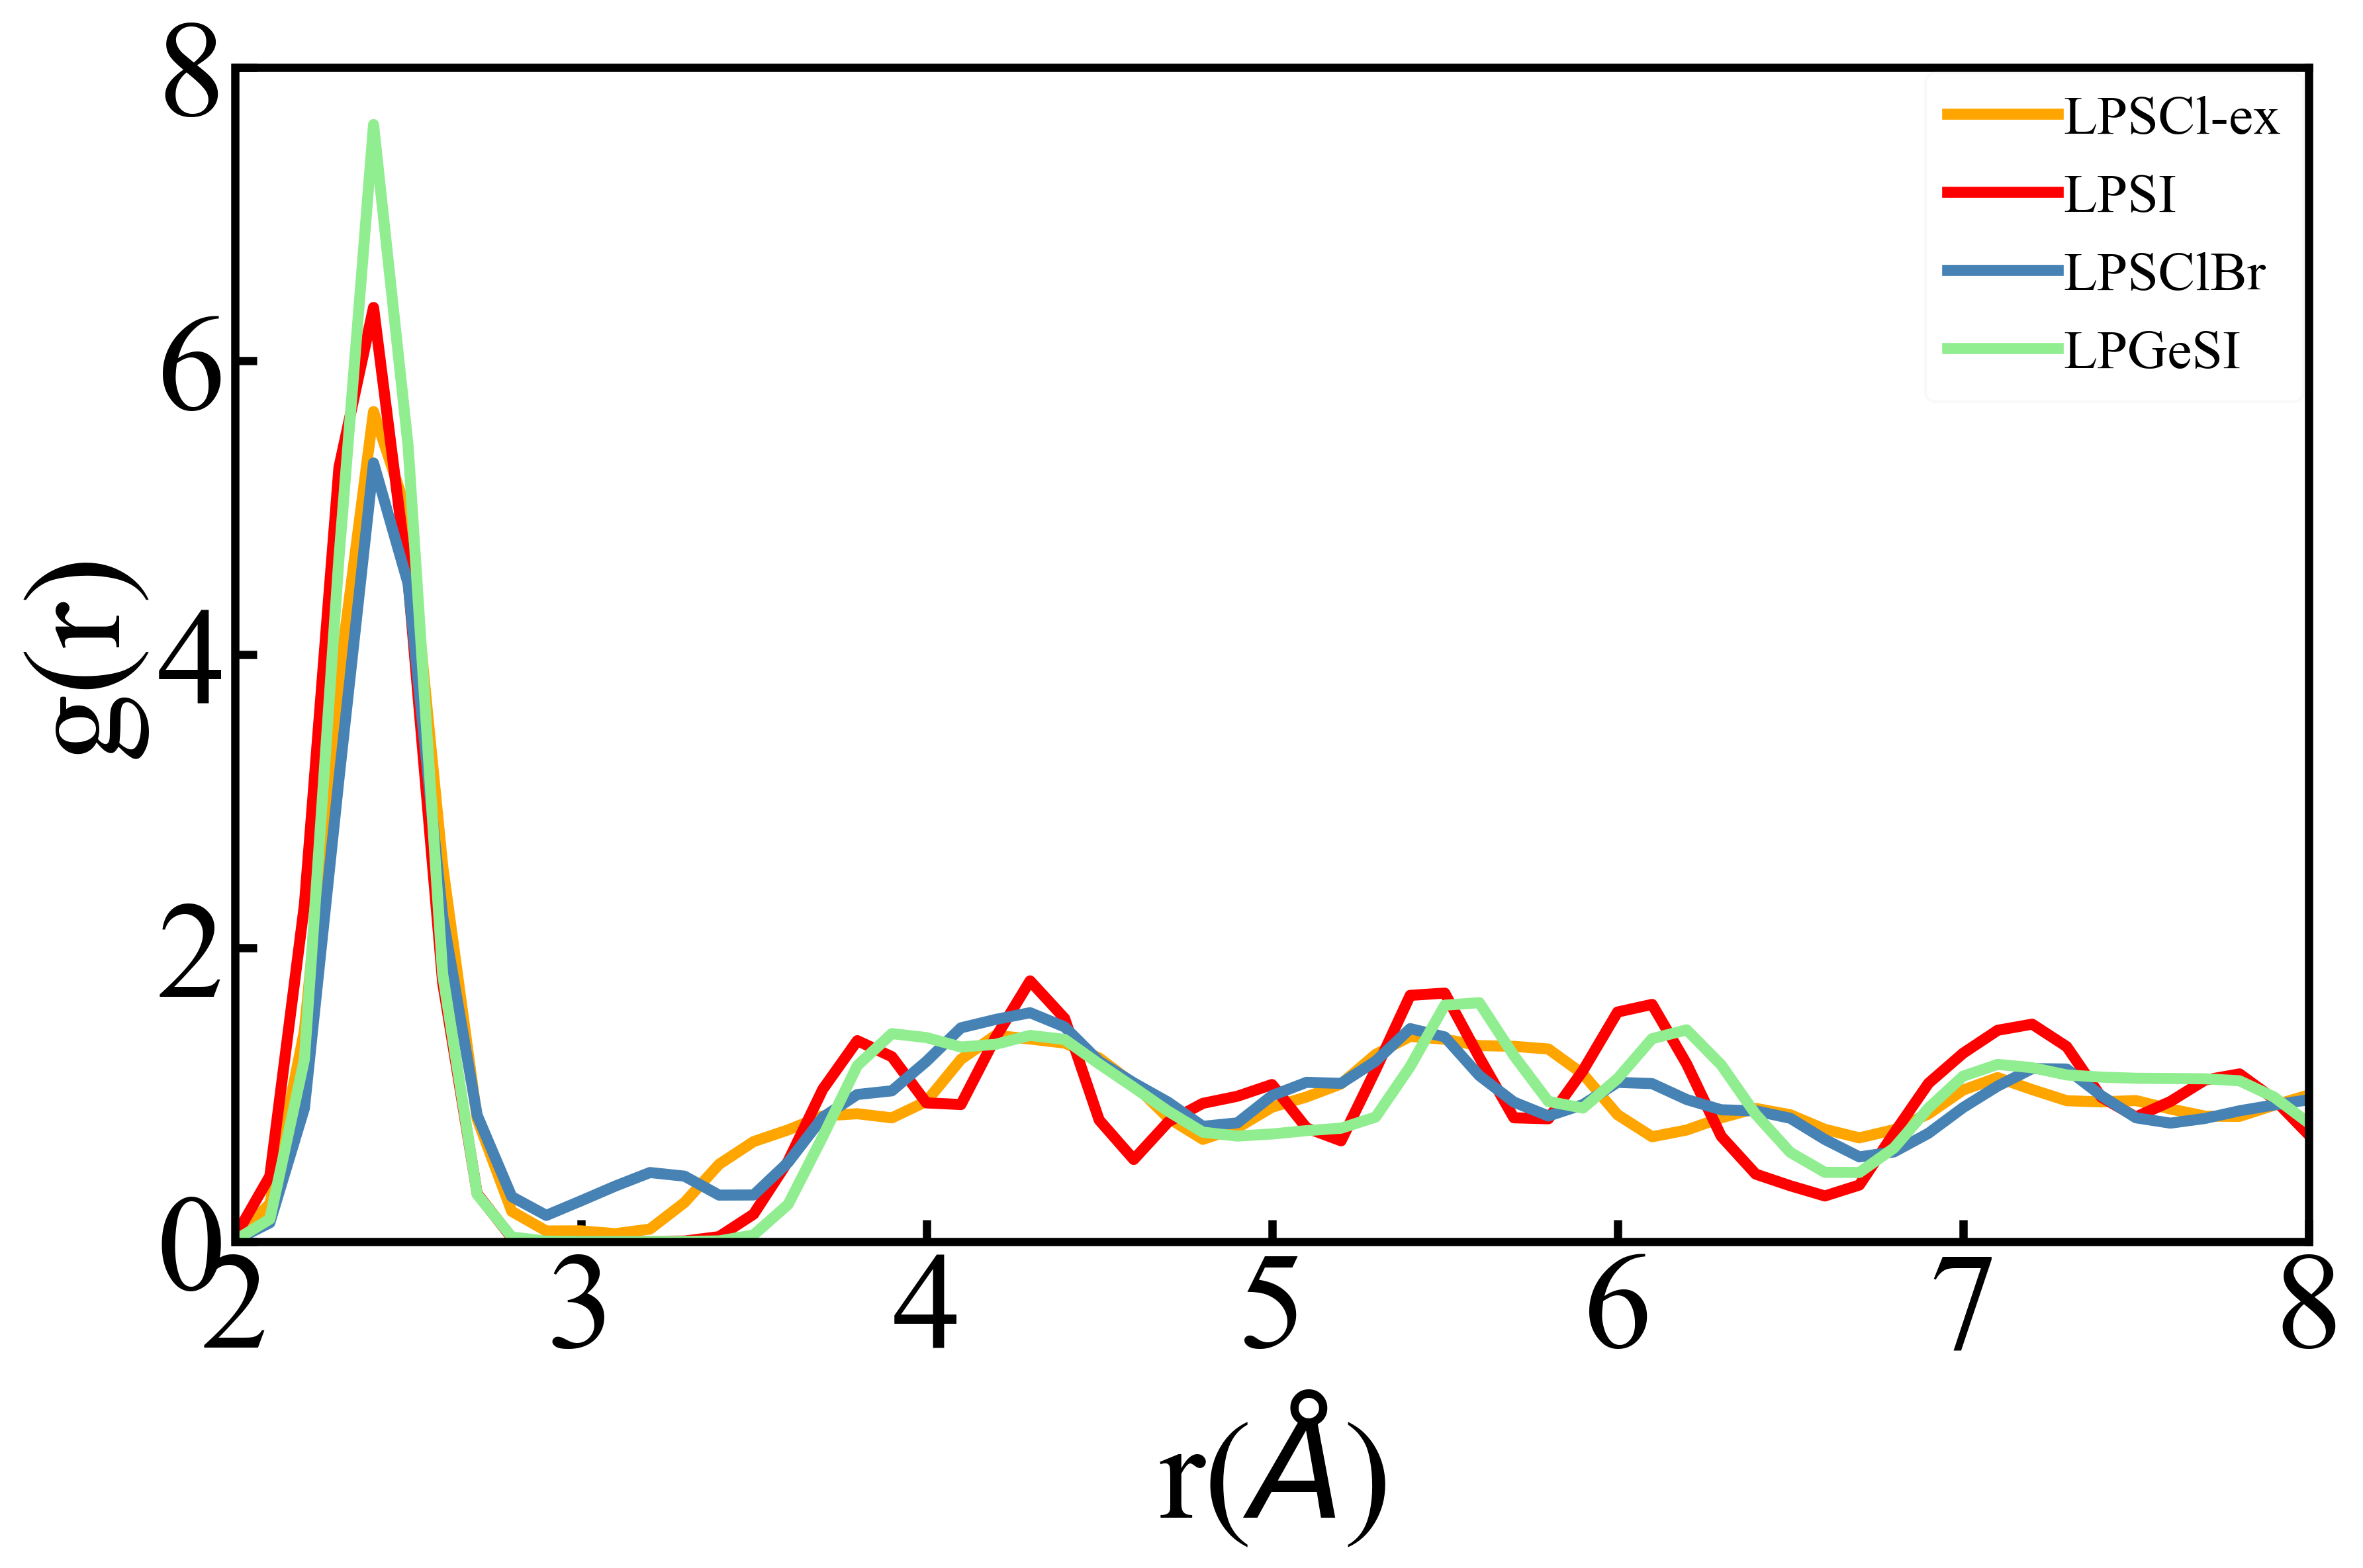

In [11]:
%%time
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

In [12]:
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        s3+=[Structure.from_file("./lpsi_hse_06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./lpsi_s_i_exchanged_hse_06_mbd_nl.vasp")]
    for i in range(n_steps):
        s5+=[Structure.from_file("./lpsclbr_with_exchange_hse06_mbd_nl_392_atom.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./lp_ge_si_hseo6_mbdnl_light_424.POSCAR.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file("./lpsi_hse_06_mbd_nl_tight.in.vasp")]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_coordination_number("S","Li")
    cn_S_Li_2 = RDFF2.get_coordination_number("S","Li")
    cn_S_Li_3 = RDFF3.get_coordination_number("S","Li")
    cn_S_Li_4 = RDFF4.get_coordination_number("S","Li")
    cn_S_Li_5 = RDFF5.get_coordination_number("S","Li")
    cn_S_Li_6 = RDFF6.get_coordination_number("S","Li")
    cn_S_Li_7 = RDFF7.get_coordination_number("S","Li")
    #cn_O_Li_4 = RDFF4.get_rdf("S","Li")
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="LPSCl",linewidth=3,c="black")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=4,c="orange")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=4,c="r")
    #plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="LPSI-ex",linewidth=2,c="red",dashes=[2,2])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=4,color="steelblue")
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=4,color="lightgreen")
    # c r m y 
    #plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="LPSI-unitcell",linewidth=3,c="c")
    #plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=2,c="lightgreen")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=2,c="mediumpurple")
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=2,color="violet")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=2,color="lightcoral")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 60)
    plt1.xlim(2, 8)
    plt1.legend(loc = 2, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.yticks([1.0, 2.0, 3.0, 4.0],fontsize=50)
    plt1.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./intgor_S_Li_composition.png",dpi=300)
    #plt1.ylabel(fontsize=40)

CPU times: user 2.35 s, sys: 142 ms, total: 2.49 s
Wall time: 1.85 s


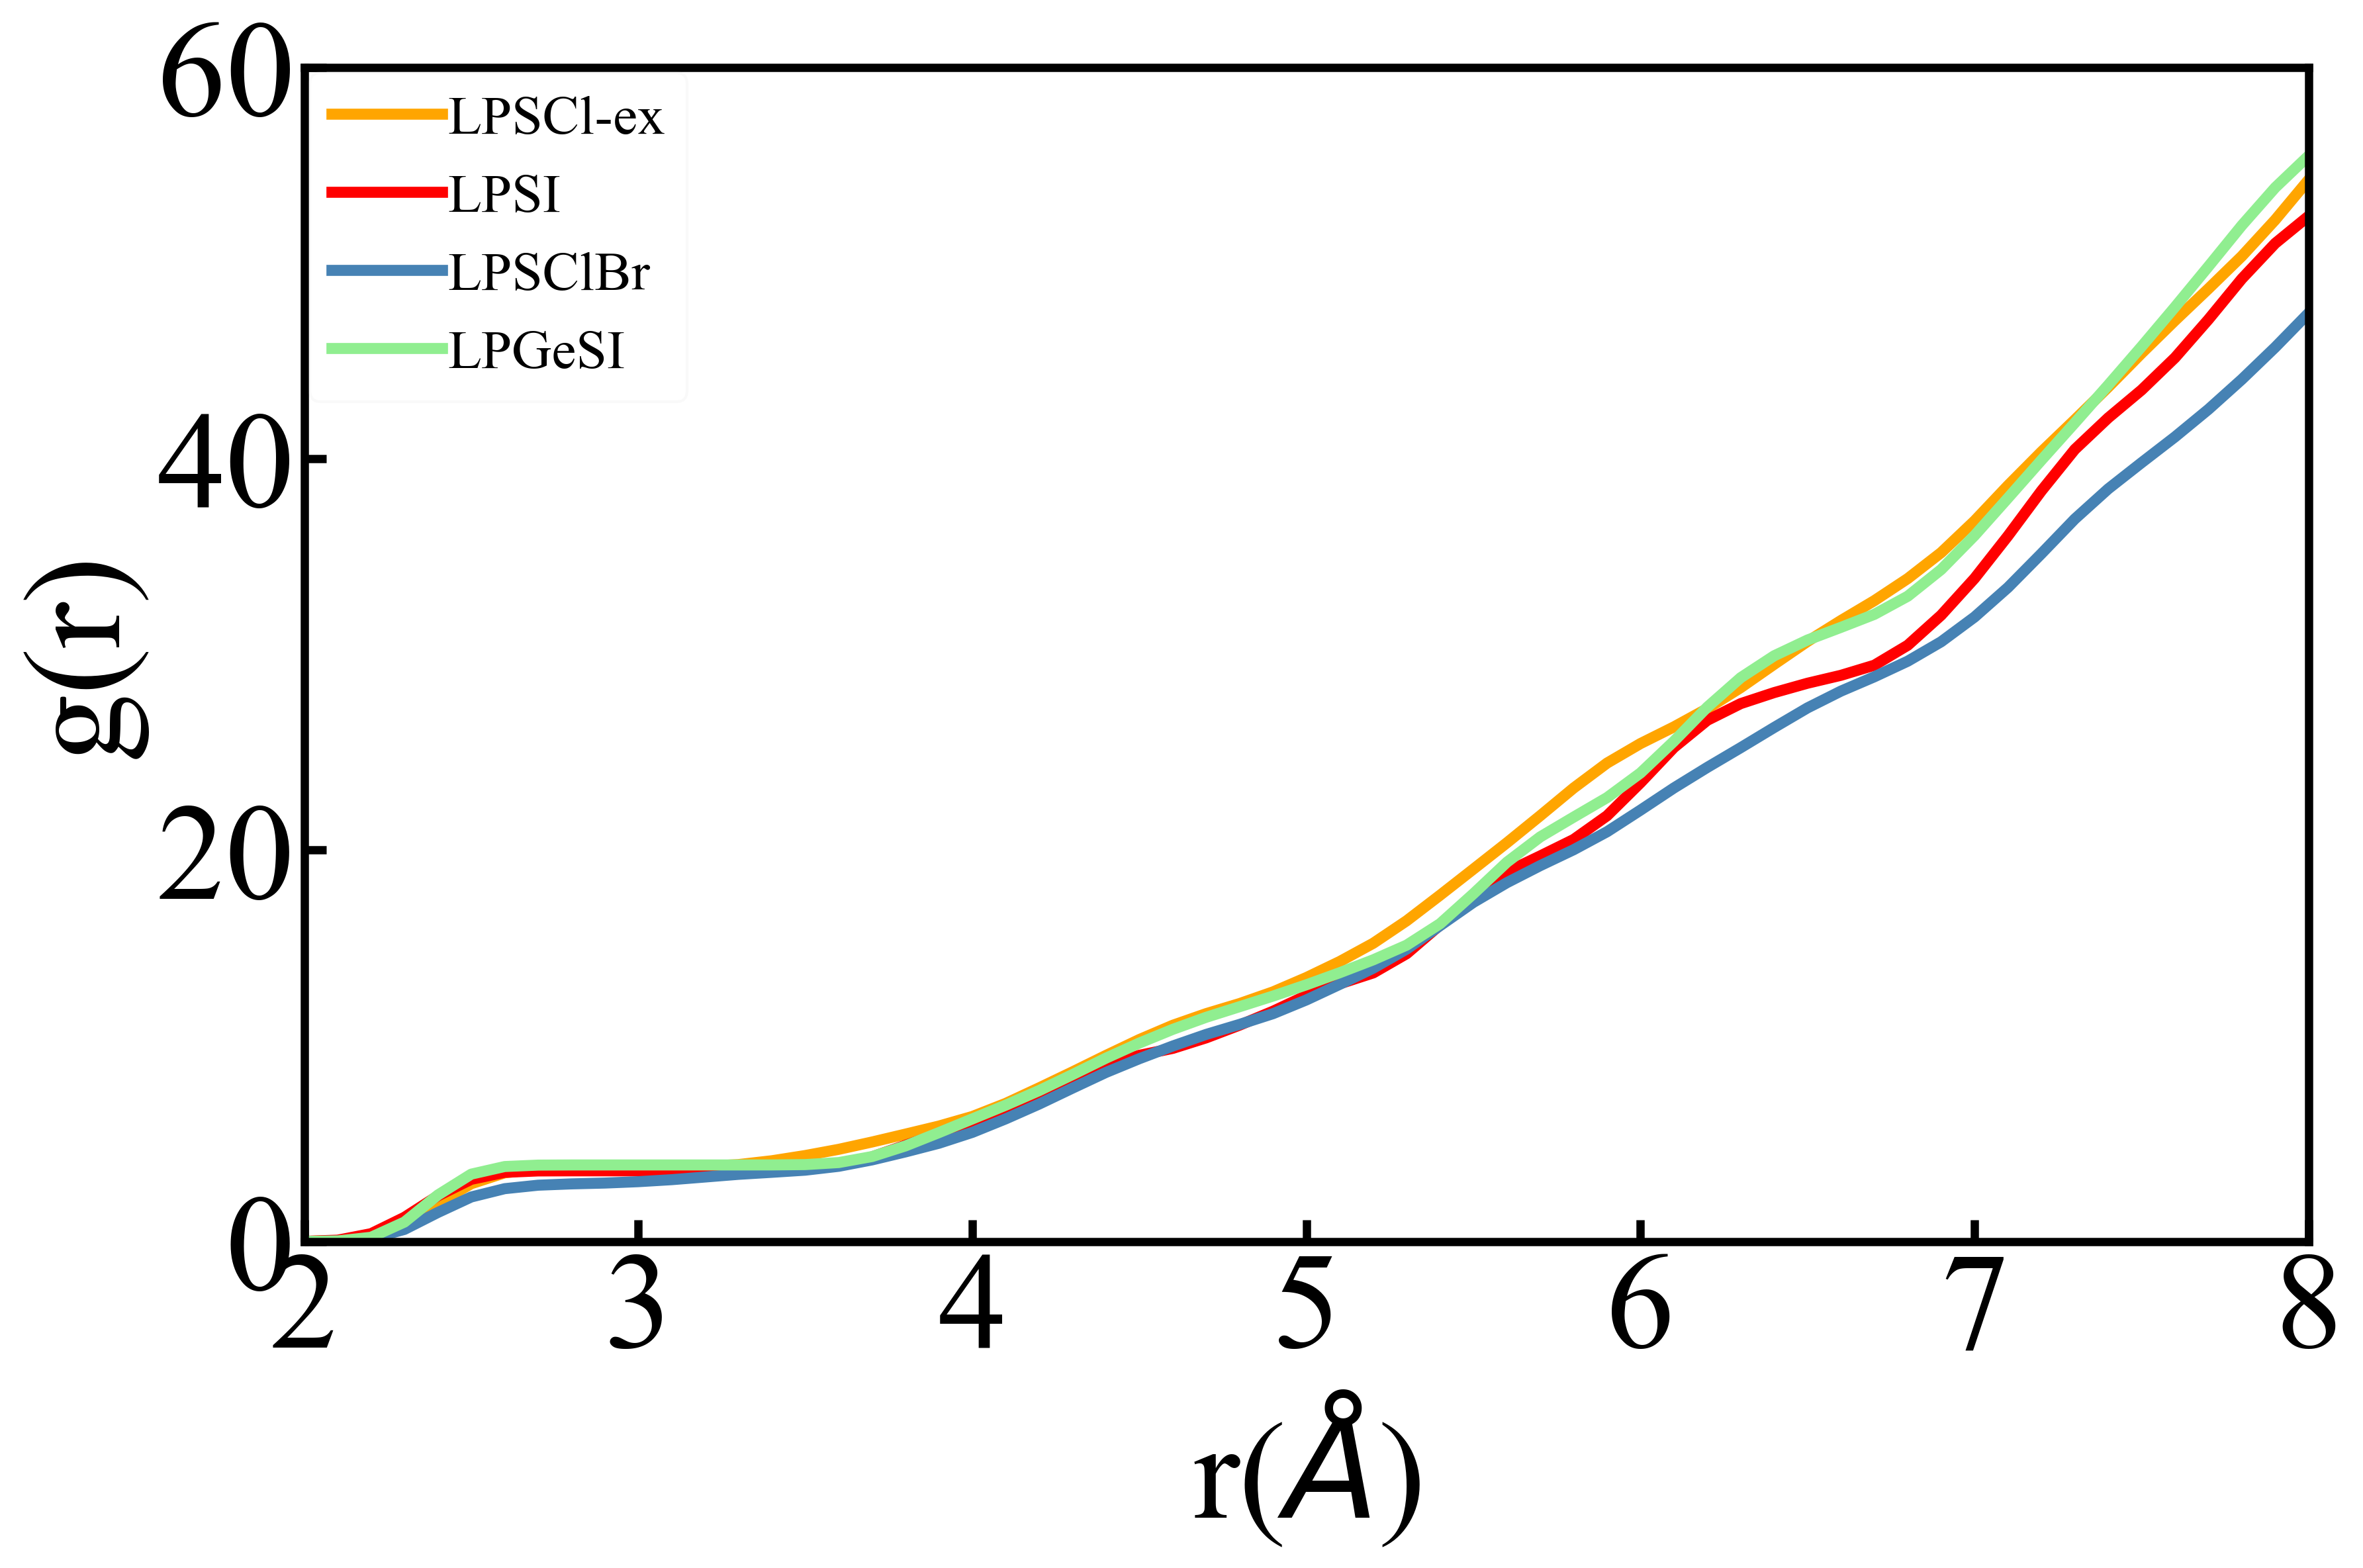

In [13]:
%%time
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

In [95]:
def plot_rdf_of_lpscl (n1,n2,n3,n4,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    s5 = []
    s6 = []
    s7 = []
    for i in range(n_steps):
        s1+=[Structure.from_file("./lpscl_hse06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s2+=[Structure.from_file("./lpscl_s_cl_exchanged_hse06_mbd_nl_408.vasp")]
    for i in range(n_steps):
        s3+=[Structure.from_file("./lpsi_hse_06_mbd_nl_408_atom.vasp")]
    for i in range(n_steps):
        s4+=[Structure.from_file("./lpsi_s_i_exchanged_hse_06_mbd_nl.vasp")]
    for i in range(n_steps):
        s5+=[Structure.from_file("./lpsclbr_with_exchange_hse06_mbd_nl_392_atom.vasp")]
    for i in range(n_steps):
        s6+=[Structure.from_file("./lp_ge_si_hseo6_mbdnl_light_424.POSCAR.vasp")]
    for i in range(n_steps):
        s7+=[Structure.from_file("./lpsi_hse_06_mbd_nl_tight.in.vasp")]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
    RDFF5 = RadialDistributionFunctionFast(s5,sigma=0.01)
    RDFF6 = RadialDistributionFunctionFast(s6,sigma=0.01)
    RDFF7 = RadialDistributionFunctionFast(s7,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_coordination_number("Li","Li")
    cn_S_Li_2 = RDFF2.get_coordination_number("Li","Li")
    cn_S_Li_3 = RDFF3.get_coordination_number("Li","Li")
    cn_S_Li_4 = RDFF4.get_coordination_number("Li","Li")
    cn_S_Li_5 = RDFF5.get_coordination_number("Li","Li")
    cn_S_Li_6 = RDFF6.get_coordination_number("Li","Li")
    cn_S_Li_7 = RDFF7.get_coordination_number("Li","Li")
    #cn_O_Li_4 = RDFF4.get_rdf("S","Li")
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="LPSCl",linewidth=3,c="black")
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=4,c="orange")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=4,c="r")
    #plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="LPSI-ex",linewidth=2,c="red",dashes=[2,2])
    plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=4,color="steelblue")
    plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=4,color="lightgreen")
    # c r m y 
    #plt1.plot(cn_S_Li_7[0],cn_S_Li_7[1], label="LPSI-unitcell",linewidth=3,c="c")
    #plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")
    #plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="LPSCl-ex",linewidth=2,c="lightgreen")
    #plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="LPSI",linewidth=2,c="mediumpurple")
    #plt1.plot(cn_S_Li_5[0],cn_S_Li_5[1], label="LPSClBr",linewidth=2,color="violet")
    #plt1.plot(cn_S_Li_6[0],cn_S_Li_6[1], label="LPGeSI",linewidth=2,color="lightcoral")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 60)
    plt1.xlim(2, 8)
    plt1.legend(loc = 2, fontsize = 20, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.yticks([1.0, 2.0, 3.0, 4.0],fontsize=50)
    plt1.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./intgor_all_composition.png",dpi=300)
    #plt1.ylabel(fontsize=40)

CPU times: user 2.32 s, sys: 137 ms, total: 2.46 s
Wall time: 1.8 s


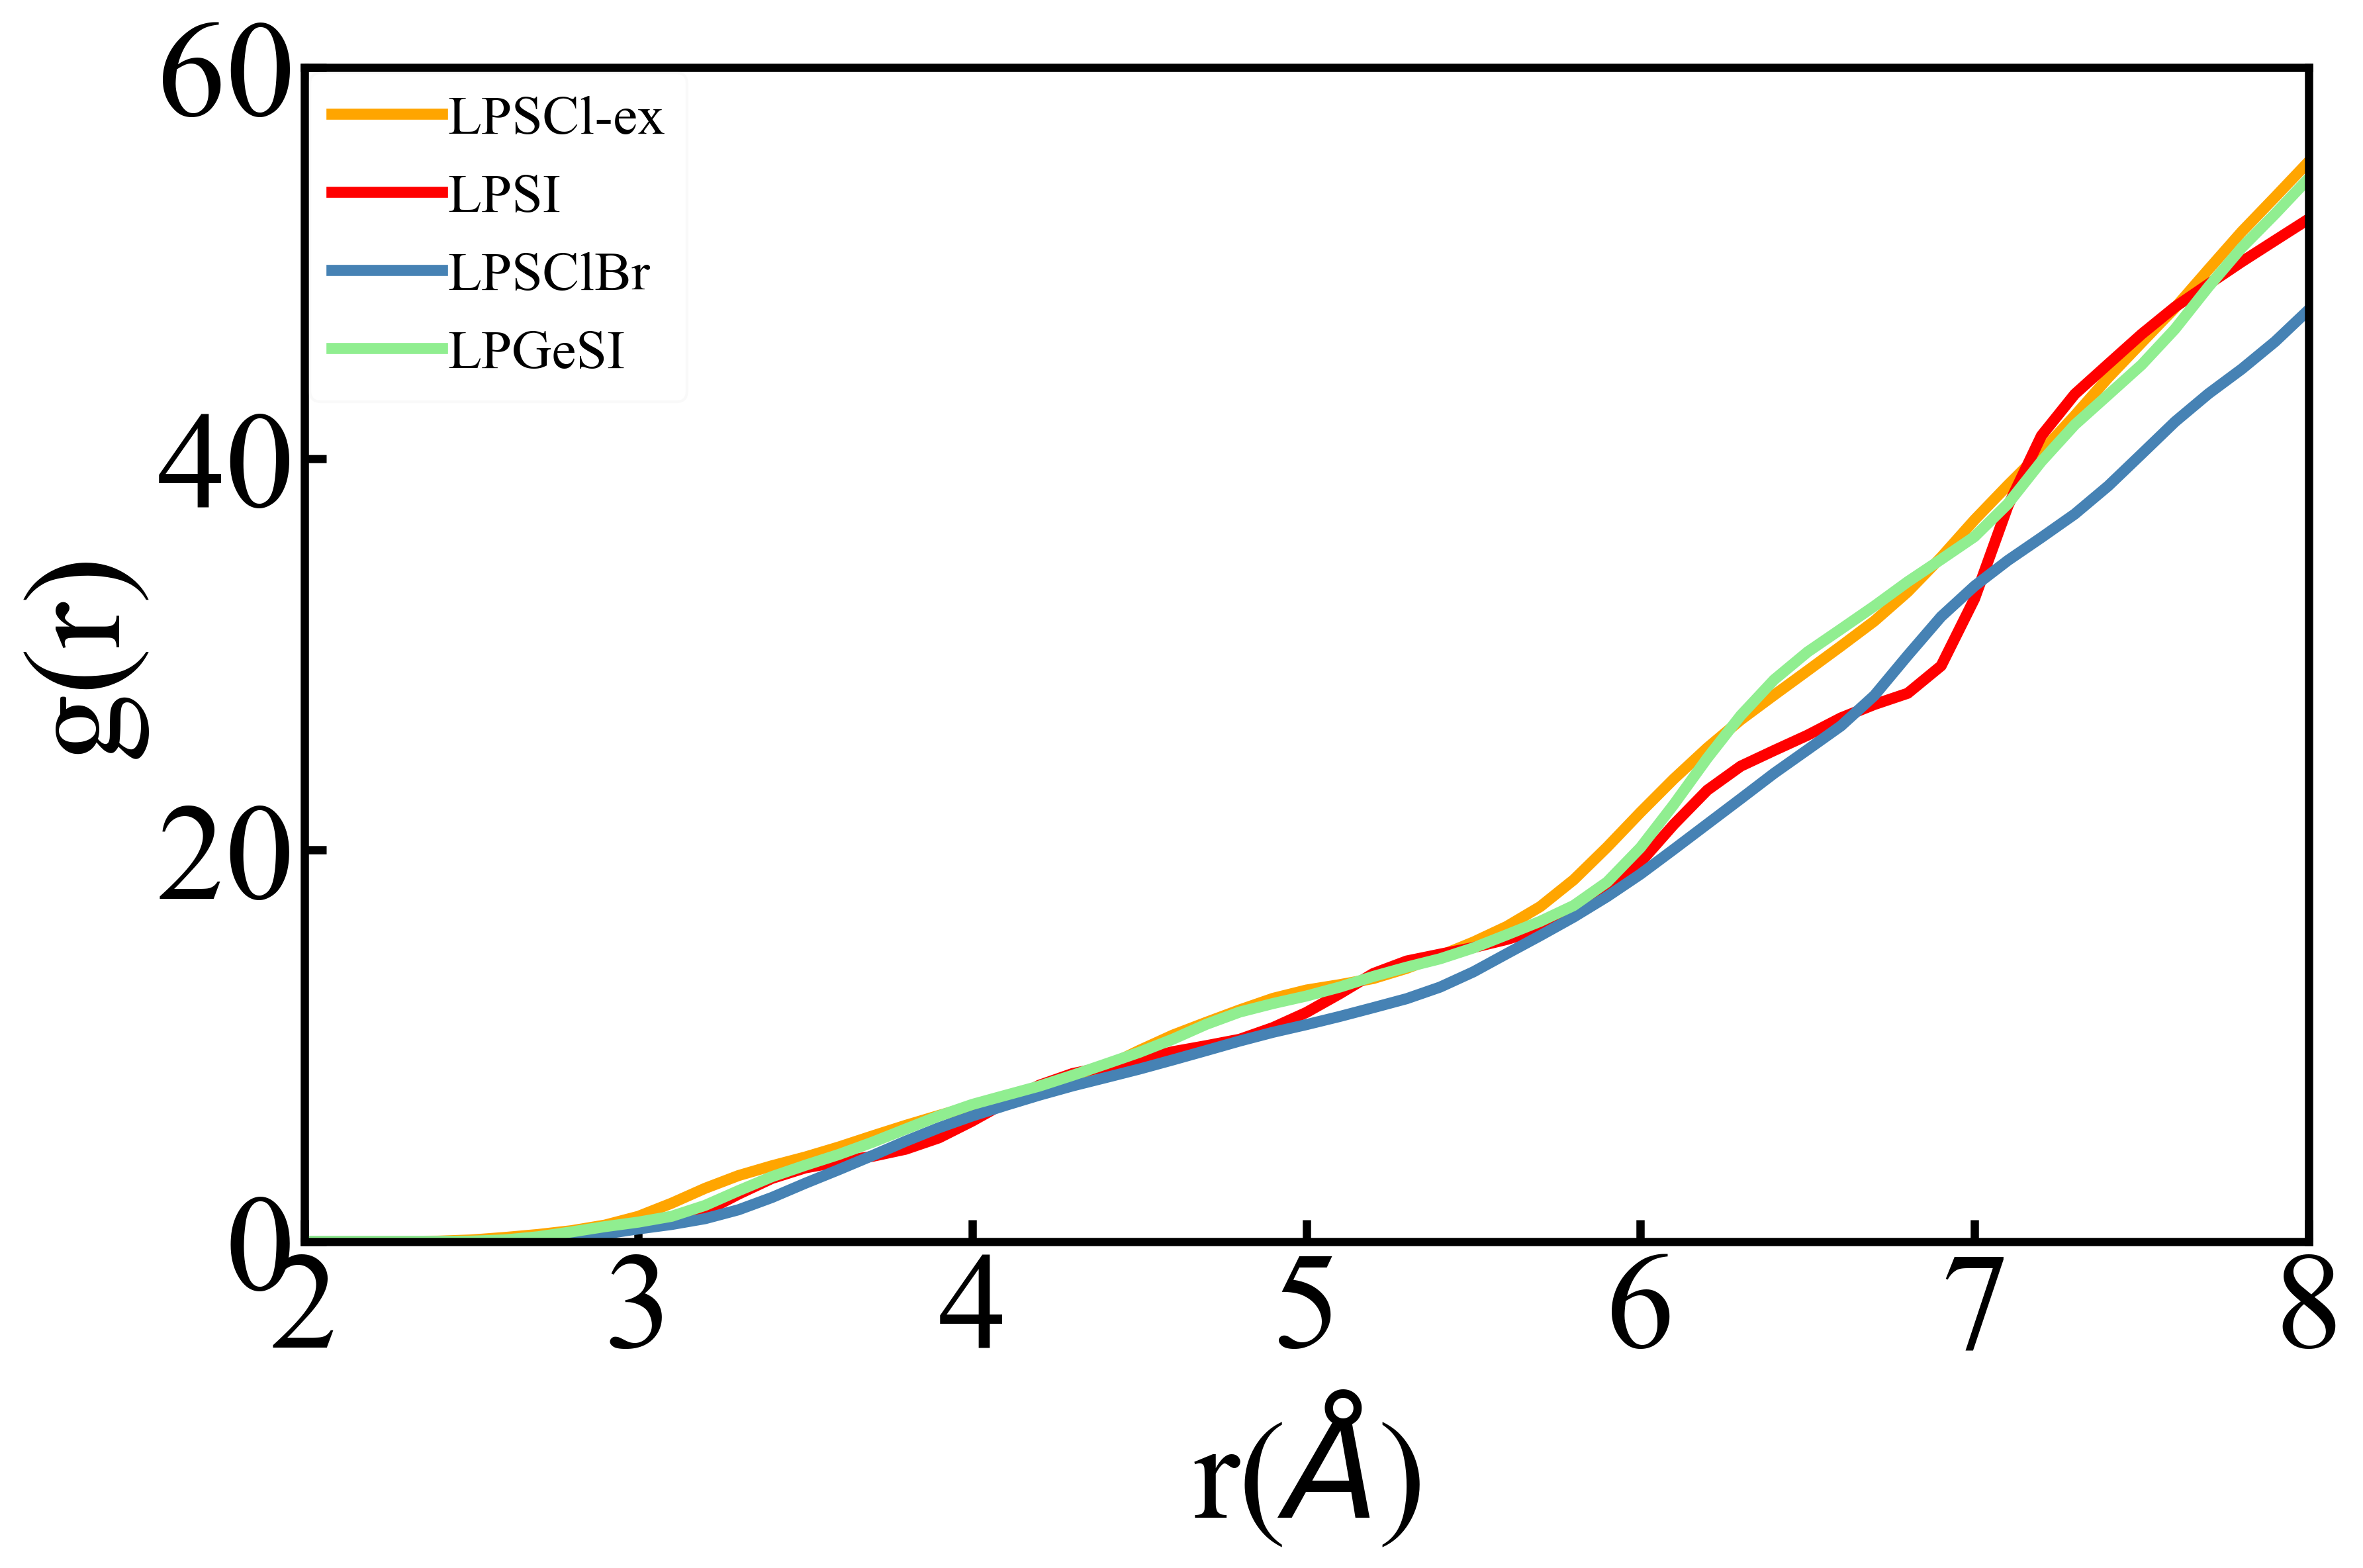

In [96]:
%%time
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

In [7]:
def plot_rdf_of_lpscl (md_id1,md_id2,md_id3,md_id4,c1,c2,c3,c4,temp,n_steps):
    s = []
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    for i in range(n_steps):
        s1+=[MDD.get_structure(md_id1,c1,temp,
                                           step=MDD.get_last_step(md_id1,c1,temp)-n_steps+i)]
    for i in range(n_steps):
        s2+=[MDD.get_structure(md_id2,c2,temp,
                                           step=MDD.get_last_step(md_id2,c2,temp)-n_steps+i)]
    for i in range(n_steps):
        s3+=[MDD.get_structure(md_id3,c3,temp,
                                           step=MDD.get_last_step(md_id3,c3,temp)-n_steps+i)]
    for i in range(n_steps):
        s4+=[MDD.get_structure(md_id4,c4,temp,
                                           step=MDD.get_last_step(md_id4,c4,temp)-n_steps+i)]
    RDFF1 = RadialDistributionFunctionFast(s1,sigma=0.01)
    RDFF2 = RadialDistributionFunctionFast(s2,sigma=0.01)
    RDFF3 = RadialDistributionFunctionFast(s3,sigma=0.01)
    RDFF4 = RadialDistributionFunctionFast(s4,sigma=0.01)
        
    #Get_coordination_number
    cn_S_Li_1 = RDFF1.get_rdf("S","Li")
    cn_S_Li_2 = RDFF2.get_rdf("S","Li")
    cn_O_Li_2 = RDFF2.get_rdf("O","Li")
    cn_S_Li_3 = RDFF3.get_rdf("S","Li")
    cn_O_Li_3 = RDFF3.get_rdf("O","Li")
    cn_S_Li_4 = RDFF4.get_rdf("S","Li")
    cn_O_Li_4 = RDFF4.get_rdf("O","Li")
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    plt1 = pretty_plot(8,8,dpi=300)
    plt1.plot(cn_S_Li_1[0],cn_S_Li_1[1], label="S-Li, x=0",linewidth=4,c="orange",dashes=[6,2])
    plt1.plot(cn_S_Li_2[0],cn_S_Li_2[1], label="S-Li, x=0.125",linewidth=4,c="cyan",dashes=[6,2])
    plt1.plot(cn_O_Li_2[0],cn_O_Li_2[1], label="O-Li, x=0.125",linewidth=4,c="cyan")
    #plt1.plot(cn_O_Li_1[0],cn_O_Li_1[1], label="Li@O (x = 0.125)",linewidth=4,c="c")
    plt1.plot(cn_S_Li_3[0],cn_S_Li_3[1], label="S-Li, x=0.25",linewidth=4,color="blue",dashes=[6,2])
    plt1.plot(cn_O_Li_3[0],cn_O_Li_3[1], label="O-Li, x=0.25",linewidth=4,color="blue")
    plt1.plot(cn_S_Li_4[0],cn_S_Li_4[1], label="S-Li, x=1.0",linewidth=4,c="red",dashes=[6,2])
    plt1.plot(cn_O_Li_4[0],cn_O_Li_4[1], label="O-Li, x=1.0",linewidth=4,c="red")

    #choose color (https://www.google.com/search?q=tricolor+combinations&client=safari&channel=mac_
    #bm&sxsrf=ALeKk00UiS6l-sxPBeRud_xOc0cIui5EBA:1596424661345&tbm=isch&source=iu&ictx=1&fir=AdbJSM
    #ZbGnYVsM%252CDueJOmbs8NEQ4M%252C_&vet=1&usg=AI4_-kR8RL6eNxdtRQfKPQTVU95i4SelaQ&sa=X&ved=2ahUKEwiJl-amif7qAhUIWCsKHfQyD9kQ9QEwBnoECAoQKA&biw=855&bih=666#imgrc=AdbJSMZbGnYVsM)
    #plt1.set_dashes([2, 2, 10, 2])
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    #plt1.ylim(0, 12)
    #plt1.xlim(0, 5)
    #plt1.legend(loc=2, prop={"size": 40})
    #plt1.xticks(fontsize=40)
    #plt1.yticks(fontsize=40)
    #plt1.xlabel()
    #cn_S_Li = RDFF.get_coordination_number("S","Li")
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    #plt1 = pretty_plot(12,8,dpi=300)
    #plt1.plot(cn_S_Li[0],cn_S_Li[1], label="Li@S",linewidth=4,c="y")
    plt1.ylim(0, 8)
    plt1.xlim(0.9, 6)
    plt1.legend(loc = 1, fontsize = 30, shadow=False, fancybox=True, framealpha=0.1, handletextpad=0.1,borderaxespad=0.1)
    #plt1.legend(loc=2, prop={"size": 40})
    plt1.yticks([0.0, 2.0, 4.0, 6.0, 8.0],fontsize=50)
    plt1.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0],fontsize=50)
    plt1.xlabel('r($\AA$)', fontsize=50)
    plt1.ylabel('g(r)', fontsize=50)
    plt1.tick_params(axis='both', labelsize=50, direction='in')#labelsize controls the ticklabel spacing/size 
    plt1.tight_layout()
    plt1.savefig(fname="./600_gor_all_composition.png",dpi=300)
    #plt1.ylabel(fontsize=40)

In [8]:
%%time
plot_rdf_of_lpscl(1040, 1074, 1025, 1026, 1)

TypeError: plot_rdf_of_lpscl() missing 5 required positional arguments: 'c2', 'c3', 'c4', 'temp', and 'n_steps'

In [ ]:
def plot_rdf_of_lpscl (md_id,config_id,temp,n_steps,n_str,title:str):
    s = []
    s1 = []
    s2 = []
    for i in range(n_steps):
        s1+=[MDD.get_structure(md_id,config_id,temp,
                                           step=MDD.get_last_step(md_id,config_id,temp)-n_steps+i)]
    print("number_of_structure",len(s1))
    for j in range (n_str):
        s2+=[Structure.from_file(filename = "str-"+str(j)+".cif")]
    s = s1+s2
    #s1.append(s2)
    RDFF = RadialDistributionFunctionFast(s1,sigma=0.01)
    rdf = RDF.from_species(s1, species=("Li"), reference_species=("S"))
    print("number_of_structure",len(s))
     
    p = rdf.get_rdf_plot()
    rdf.export_rdf("rdf_0.75_300_li-cl.csv")
    output = pds.DataFrame([rdf.interval, rdf.coordination_number]).T
    #output = pds.DataFrame([rdf.coordination_number]).T
    output.to_csv("intgor_0.75_300_li-cl.csv")
    a_Li_Cl = RDFF.get_rdf("Li","Cl")
    
    #a_Li_S = RDFF.get_rdf("Li","S")
    #a_Li_Li = RDFF.get_rdf("Li","Li")
    #a_Li_P = RDFF.get_rdf("Li","P")
    
    plt = pretty_plot(12,8,dpi=300)
    plt.plot(a_Li_Cl[0],a_Li_Cl[1], label="0_Li-Cl",linewidth=2.0,c="g")
    #plt.plot(cn_Li_Cl[0],cn_Li_Cl[0], label="cn_Li_Cl",linewidth=2.0,c="r")
    #plt.plot(a_Li_S[0],a_Li_S[1], label="0_Li-S",linewidth=2.0,c="b")
    #plt.plot(a_Li_Li[0],a_Li_Li[1], label="0_Li-Li",linewidth=3.5,c="k")
    ##plt.plot(a_Li_P[0],a_Li_P[1], label="Li-P",linewidth=2.5,dashes=[6,2],c="m")
    
    #line1, = plt.plot(a_O_O[0],a_O_O[1], label='O-O',c="c")
    #line1.set_dashes([2, 2, 10, 2]) 
    
    plt.ylim(0, 3)
    plt.xlim(0, 8)
    if title:
        plt.title(title,size=30)
    plt.legend(loc=1, prop={"size": 30})
    plt.xlabel("r($\AA$)")
    plt.ylabel("g(r)")

    #plt.ylim(-0.2,10)
    #plt.xlim(1.01, 10)
    #if title:
        #plt.title(title,size=30)
        
    #cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    cn_Li_Cl = RDFF.get_coordination_number("Li","Cl")
    cn_Cl_Li = RDFF.get_coordination_number("Cl","Li")
    plt1 = pretty_plot(12,8,dpi=300)
    plt1.plot(cn_Li_Cl[0],cn_Li_Cl[1], label="cn_Li-Cl",linewidth=2.0,c="r")
    plt1.plot(cn_Cl_Li[0],cn_Cl_Li[1], label="cn_Cl-Li",linewidth=2.0,c="b")
    plt1.ylim(0, 30)
    plt1.xlim(0, 8)
    if title:
        plt1.title(title,size=30)
    plt1.legend(loc=1, prop={"size": 30})
    plt1.xlabel("r($\AA$)")
    plt1.ylabel("g(r)")